<a href="https://colab.research.google.com/github/arpitamangal/customer-segmentation/blob/main/CustomerLifetime%26SocialNetworkAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Run below commands
#!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
#!tar xf spark-3.1.2-bin-hadoop3.2.tgz
#!pip install -q findspark

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=6ae312a3a96ca529d25d43eb2e6f8f0605b401c7a4f6d0e4bcc54a11f9665cba
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [ ]:
#!pip install pyspark
#-------------------------------------------------
from pyspark.sql import SparkSession
from pyspark import SparkConf, SparkContext
from datetime import datetime, date, timedelta
from dateutil import relativedelta
from pyspark.sql import SQLContext, Row
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.sql import DataFrame
from pyspark.sql.functions import *
from pyspark.sql.functions import to_timestamp, to_date
from pyspark.sql import functions as F
from pyspark.sql.functions import collect_list, collect_set, concat, first, array_distinct, col, size, expr
from pyspark.sql import DataFrame
import random
import pandas as pd

In [ ]:
#import os
#os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
#os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop3.2"

In [ ]:
#import findspark
#findspark.init()
from pyspark.sql import SparkSession
from pyspark import SparkConf, SparkContext
from datetime import datetime, date, timedelta
from dateutil import relativedelta
from pyspark.sql import SQLContext, Row
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.sql import DataFrame
from pyspark.sql.functions import *
from pyspark.sql.functions import to_timestamp, to_date
from pyspark.sql import functions as F
from pyspark.sql.functions import collect_list, collect_set, concat, first, array_distinct, col, size, expr
from pyspark.sql import DataFrame
import random
import pandas as pd
import re

In [ ]:
from pyspark.sql import SparkSession
from pyspark import SparkConf, SparkContext

In [ ]:
# Define the spark session
spark = SparkSession\
        .builder\
        .getOrCreate()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, StringType

# Text Analytics

In [ ]:
venmo_df = spark.read.parquet("VenmoSample.snappy.parquet")

# take a random sample of the Venmo DataFrame
venmo_sample_df = venmo_df.sample(fraction=0.1, seed=42) # specify the fraction and seed as desired

In [ ]:
venmo_sample_df.show()

+-------+-------+----------------+-------------------+--------------------+-----------+--------------------+
|  user1|  user2|transaction_type|           datetime|         description|is_business|            story_id|
+-------+-------+----------------+-------------------+--------------------+-----------+--------------------+
| 730075| 804466|         payment|2016-05-26 04:46:45|                Food|      false|57461d46cd03c9af2...|
|4682257|1870271|         payment|2016-02-24 09:14:12|     🔮 gypsy things|      false|56cd03e4cd03c9af2...|
| 241386|2580543|         payment|2015-05-17 06:00:19|           Furniture|      false|5557cc0407f81c33e...|
|3393501|1791591|         payment|2015-03-14 00:24:53|           Bleachers|      false|55031d67cd03c9af2...|
|1864528| 437516|         payment|2015-12-07 00:51:11|The decline of we...|      false|5664677fcd03c9af2...|
|5670003| 618376|         payment|2016-07-17 03:50:26|              Crepes|      false|578a9e1223e064eac...|
| 884214|1386238|   

In [ ]:
# load the text and emoji dictionaries as PySpark DataFrames or RDDs
text_dict_df = spark.read.csv("Venmo Word Classification Dictonary Word_Dict.csv", header=True, inferSchema=True)


In [ ]:
text_dict_df.show()

+----------+---------+------------+--------+-------+--------------+-----------+---------+---------------+
|    People|     Food|       Event|Activity| Travel|Transportation|    Utility|     Cash|Illegal/Sarcasm|
+----------+---------+------------+--------+-------+--------------+-----------+---------+---------------+
|    friend|     food|    birthday|    ball|  beach|          lyft|       bill|     atm |      addiction|
|friendship|      bbq|   christmas|    boat|  place|          uber|      cable|    bank |           drug|
|      baby|     bean|       happy|     bar|     la|           cab|        fee|    cash |          wangs|
|       boy|    latte|        bday|    book|  world|           bus|   electric|    money|           weed|
|      girl|breakfast|     wedding|    club|  hotel|           car|electricity|     buck|           anal|
|      help|   brunch|        xmas|    card|   trip|           gas|   internet|   wallet|             bj|
|      like|   burger|     holiday|   dance|  

In [ ]:
emoji_dict_df = spark.read.csv("Venmo_Emoji_Classification_Dictionary.csv", header=True, inferSchema=True)

In [ ]:
emoji_dict_df.show()

+-----+------+----+--------+--------------+------+-------+
|Event|Travel|Food|Activity|Transportation|People|Utility|
+-----+------+----+--------+--------------+------+-------+
| 🇦🇺|    🏔|  🍇|      👾|            🚄|    😀|      ⚡|
| 🇫🇷|     ⛰|  🍈|      🕴|            🚅|    😃|     💡|
|   🎂|    🌋|  🍉|      🎪|            🚆|    😄|     🔌|
|   🛍|    🗻|  🍊|      🎭|            🚇|    😁|     📺|
| 🇨🇦|    🏕|  🍋|      🎨|            🚈|    😆|     🔌|
| 🇧🇷|    🏖|  🍌|      🎰|            🚉|    😅|      ⚡|
|   🐉|    🏜|  🍍|      🚣|            🚊|    🤣|     💡|
|   🎅|    🏝|  🍎|      🛀|            🚝|    😂|     💸|
| 🇲🇽|    🏞|  🍏|      🎗|            🚞|    🙂|     💦|
| 🇨🇳|    🏟|  🍐|      🎟|            🚋|   🙃-|     💧|
|   🐰|    🏛|  🍑|      🎫|            🚌|    😉|     📱|
|   🎥|    🏗|  🍒|      🎖|            🚍|    😊|     🏢|
|   🍂|    🏘|  🍓|      🏆|            🚎|    😇|     🏣|
|   👨|    🏙|  🍅|      🏅|            🚏|    🥰|     🔥|
|   💪|    🏚|  🍆|       ⚽|            🚐|   😍-|   null|
|   🎓|    🏢|  🌽|       ⚾|            🚑|   🤩-

In [ ]:
import pyspark.sql.functions as F
import re

# Define a regular expression pattern to match emojis
emoji_pattern = r"[\U0001F300-\U0001F64F]|[\U0001F680-\U0001F6FF]|[\u2600-\u26FF\u2700-\u27BF]"

# Create a UDF (User Defined Function) to extract emojis from the description
extract_emojis = F.udf(lambda text: ''.join(re.findall(emoji_pattern, text)))

# Create a UDF to remove emojis from the description
remove_emojis = F.udf(lambda text: re.sub(emoji_pattern, '', text))

# Create a UDF to convert text to lowercase
convert_to_lowercase = F.udf(lambda text: text.lower())

# Add a new column 'emojis' containing the extracted emojis
venmo_sample_df = venmo_sample_df.withColumn('emojis', extract_emojis(F.col('description')))

# Add a new column 'text_only' containing the text without emojis
venmo_sample_df = venmo_sample_df.withColumn('text_only', remove_emojis(F.col('description')))

# Add a new column 'text_only_lower' containing the lowercase text
venmo_sample_df = venmo_sample_df.withColumn('text_only_lower', convert_to_lowercase(F.col('text_only')))

In [ ]:
venmo_sample_df.show()

+-------+-------+----------------+-------------------+--------------------+-----------+--------------------+---------+--------------------+--------------------+
|  user1|  user2|transaction_type|           datetime|         description|is_business|            story_id|   emojis|           text_only|     text_only_lower|
+-------+-------+----------------+-------------------+--------------------+-----------+--------------------+---------+--------------------+--------------------+
| 730075| 804466|         payment|2016-05-26 04:46:45|                Food|      false|57461d46cd03c9af2...|         |                Food|                food|
|4682257|1870271|         payment|2016-02-24 09:14:12|     🔮 gypsy things|      false|56cd03e4cd03c9af2...|       🔮|        gypsy things|        gypsy things|
| 241386|2580543|         payment|2015-05-17 06:00:19|           Furniture|      false|5557cc0407f81c33e...|         |           Furniture|           furniture|
|3393501|1791591|         payment|20

In [ ]:
from pyspark.ml.feature import Tokenizer

# Create a tokenizer instance
tokenizer = Tokenizer(inputCol='text_only_lower', outputCol='tokens')

# Apply the tokenizer to the dataframe
venmo_sample_df = tokenizer.transform(venmo_sample_df)

In [ ]:
venmo_sample_df.show()

+-------+-------+----------------+-------------------+--------------------+-----------+--------------------+---------+--------------------+--------------------+--------------------+
|  user1|  user2|transaction_type|           datetime|         description|is_business|            story_id|   emojis|           text_only|     text_only_lower|              tokens|
+-------+-------+----------------+-------------------+--------------------+-----------+--------------------+---------+--------------------+--------------------+--------------------+
| 730075| 804466|         payment|2016-05-26 04:46:45|                Food|      false|57461d46cd03c9af2...|         |                Food|                food|              [food]|
|4682257|1870271|         payment|2016-02-24 09:14:12|     🔮 gypsy things|      false|56cd03e4cd03c9af2...|       🔮|        gypsy things|        gypsy things|   [, gypsy, things]|
| 241386|2580543|         payment|2015-05-17 06:00:19|           Furniture|      false|5557c

### Classify Venmo’s transactions

In [ ]:
# Reshaping the text dataset:
from pyspark.sql.functions import expr, col, lit

# Rename the "Illegal/Sarcasm" column
text_dict_df = text_dict_df.withColumnRenamed("Illegal/Sarcasm", "IllegalSarcasm")

# Reshape the DataFrame:
reshaped_df = (text_dict_df
    .selectExpr("stack(" + str(len(text_dict_df.columns)) + ", " + ", ".join(["'"+c+"', "+c for c in text_dict_df.columns]) + ") AS (category, value)")
    .orderBy(col('category'))
    .filter(col('value').isNotNull()) # Exclude rows where "value" is null
)

# Show the reshaped DataFrame
reshaped_df.show(truncate=False)

+--------+--------+
|category|value   |
+--------+--------+
|Activity|gift    |
|Activity|ticket  |
|Activity|boat    |
|Activity|book    |
|Activity|club    |
|Activity|card    |
|Activity|dance   |
|Activity|football|
|Activity|fun     |
|Activity|game    |
|Activity|bar     |
|Activity|ball    |
|Activity|golf    |
|Activity|hair    |
|Activity|pt      |
|Activity|movie   |
|Activity|lesson  |
|Activity|park    |
|Activity|party   |
|Activity|poker   |
+--------+--------+
only showing top 20 rows



In [ ]:
# Reshape the emoji dataset:

from pyspark.sql.functions import expr, col, lit

# Reshape the DataFrame
reshaped_emoji_df = (emoji_dict_df
    .selectExpr("stack(" + str(len(emoji_dict_df.columns)) + ", " + ", ".join(["'"+c+"', "+c for c in emoji_dict_df.columns]) + ") AS (category2, value2)")
    .orderBy(col('category2'))
    .filter(col('value2').isNotNull()) # Exclude rows where "value" is null
)

# Show the reshaped DataFrame
reshaped_emoji_df.show(truncate=False)

+---------+------+
|category2|value2|
+---------+------+
|Activity |🏅    |
|Activity |🎿    |
|Activity |⚽     |
|Activity |🕴    |
|Activity |⚾     |
|Activity |🎭    |
|Activity |🏀    |
|Activity |🎰    |
|Activity |🏐    |
|Activity |🛀    |
|Activity |🏈    |
|Activity |🎟    |
|Activity |🏉    |
|Activity |🎖    |
|Activity |🎾    |
|Activity |🏏    |
|Activity |🏑    |
|Activity |🚣    |
|Activity |🏒    |
|Activity |🎨    |
+---------+------+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import array_contains

# Perform the first join operation
joined_df = venmo_sample_df.join(reshaped_df, array_contains('tokens', reshaped_df.value), 'left')

# Perform the second join operation
#joined_df = joined_df.join(reshaped_emoji_df, array_contains(reshaped_emoji_df['value'], joined_df['emojis']), 'left')
joined_df = joined_df.join(reshaped_emoji_df, col("emojis").contains(reshaped_emoji_df.value2), "left_outer")
joined_df = joined_df.withColumn('category_class',
                                 when(col('category').isNull(), col('category2'))
                                 .otherwise(col('category')))

joined_df = joined_df.withColumn('category_class',
                                 when(col('category_class').isNull(), 'unclassified')
                                 .otherwise(col('category_class')))
# Display the resulting dataframe
joined_df.show(50)

+--------+--------+----------------+-------------------+--------------------+-----------+--------------------+---------+--------------------+--------------------+--------------------+--------------+-----------+---------+------+--------------+
|   user1|   user2|transaction_type|           datetime|         description|is_business|            story_id|   emojis|           text_only|     text_only_lower|              tokens|      category|      value|category2|value2|category_class|
+--------+--------+----------------+-------------------+--------------------+-----------+--------------------+---------+--------------------+--------------------+--------------------+--------------+-----------+---------+------+--------------+
|  730075|  804466|         payment|2016-05-26 04:46:45|                Food|      false|57461d46cd03c9af2...|         |                Food|                food|              [food]|          Food|       food|     null|  null|          Food|
| 4682257| 1870271|         

In [ ]:
import pyspark.sql.functions as F

joined_df = joined_df.withColumn(
    'emojionly',
    F.when(F.col('value').isNull() & F.col('value2').isNotNull(), 1).otherwise(0)
)

In [ ]:
joined_df.show(50)

+--------+--------+----------------+-------------------+--------------------+-----------+--------------------+---------+--------------------+--------------------+--------------------+--------------+-----------+---------+------+--------------+---------+
|   user1|   user2|transaction_type|           datetime|         description|is_business|            story_id|   emojis|           text_only|     text_only_lower|              tokens|      category|      value|category2|value2|category_class|emojionly|
+--------+--------+----------------+-------------------+--------------------+-----------+--------------------+---------+--------------------+--------------------+--------------------+--------------+-----------+---------+------+--------------+---------+
|  730075|  804466|         payment|2016-05-26 04:46:45|                Food|      false|57461d46cd03c9af2...|         |                Food|                food|              [food]|          Food|       food|     null|  null|          Food

### Percent of emoji only transactions

In [ ]:
import pyspark.sql.functions as F

# Calculate the count of emojionly values
emojionly_count = joined_df.select(F.col("emojionly")).groupBy(F.col("emojionly")).agg(F.count(F.col("emojionly")).alias("Count_emojionly"))

# Calculate the total count
total_count = joined_df.count()

# Calculate the percentage
emojionly_percentage = emojionly_count.withColumn("Percentage", (F.col("Count_emojionly") / total_count) * 100)

# Show the result
emojionly_percentage.show()

#+---------+---------------+------------------+
#|emojionly|Count_emojionly|        Percentage|
#+---------+---------------+------------------+
#|        1|         256023|29.054266451351523|
#|        0|         625166| 70.94573354864848|
#+---------+---------------+------------------+


+---------+---------------+------------------+
|emojionly|Count_emojionly|        Percentage|
+---------+---------------+------------------+
|        1|         256023|29.054266451351523|
|        0|         625166| 70.94573354864848|
+---------+---------------+------------------+



### Top 5 most popular emoji

In [ ]:
import pyspark.sql.functions as F

# Filter out null values in value2 column
filtered_df = joined_df.filter(F.col("value2").isNotNull())

# Group by emoji value and count occurrences
emoji_counts = filtered_df.groupBy("value2").count()

# Sort the counts in descending order
sorted_emoji_counts = emoji_counts.orderBy(F.desc("count"))

# Select the top 5 emojis
top_5_emojis = sorted_emoji_counts.select("value2", "count").limit(5)

# Show the top 5 emojis
top_5_emojis.show()


+------+-----+
|value2|count|
+------+-----+
|    🍕|10969|
|    🍻|10815|
|    🎉| 8006|
|    🍷| 7286|
|    🍺| 6446|
+------+-----+



### Top 3 popular emoji Categories

In [ ]:
import pyspark.sql.functions as F

# Filter out null values in value2 column
filtered_df = joined_df.filter(F.col("category2").isNotNull())

# Group by emoji value and count occurrences
emoji_counts = filtered_df.groupBy("category2").count()

# Sort the counts in descending order
sorted_emoji_counts = emoji_counts.orderBy(F.desc("count"))

top_3_emojis_cat = sorted_emoji_counts.select("category2", "count").limit(3)

top_3_emojis_cat.show()

+---------+------+
|category2| count|
+---------+------+
|     Food|124945|
|   People| 78673|
| Activity| 33728|
+---------+------+



###  Variables to Categorise Spending Bhavior Profile
For example, if a user has made 10 transactions, where 5 of them are food and the other 5 are activity, then the user’s spending profile will be 50% food and 50% activity.

In [ ]:
from pyspark.sql.functions import when, col


joined_df = joined_df.withColumn("food", when((col("category") == "Food") | (col("category2") == "Food"), 1).otherwise(0))
joined_df = joined_df.withColumn("people", when((col("category") == "People") | (col("category2") == "People"), 1).otherwise(0))
joined_df = joined_df.withColumn("event", when((col("category") == "Event") | (col("category2") == "Event"), 1).otherwise(0))
joined_df = joined_df.withColumn("activity", when((col("category") == "Activity") | (col("category2") == "Activity"), 1).otherwise(0))
joined_df = joined_df.withColumn("travel", when((col("category") == "Travel") | (col("category2") == "Travel"), 1).otherwise(0))
joined_df = joined_df.withColumn("transportation", when((col("category") == "Transportation") | (col("category2") == "Transportation"), 1).otherwise(0))
joined_df = joined_df.withColumn("utility", when((col("category") == "Utility") | (col("category2") == "Utility"), 1).otherwise(0))
joined_df = joined_df.withColumn("cash", when((col("category") == "Cash") | (col("category2") == "Cash"), 1).otherwise(0))
joined_df = joined_df.withColumn("illegalSarcasm", when((col("category") == "IllegalSarcasm") | (col("category2") == "IllegalSarcasm"), 1).otherwise(0))

joined_df.show()

+-------+-------+----------------+-------------------+--------------------+-----------+--------------------+---------+--------------------+--------------------+--------------------+--------------+-----------+---------+------+--------------+---------+----+------+-----+--------+------+--------------+-------+----+--------------+
|  user1|  user2|transaction_type|           datetime|         description|is_business|            story_id|   emojis|           text_only|     text_only_lower|              tokens|      category|      value|category2|value2|category_class|emojionly|food|people|event|activity|travel|transportation|utility|cash|illegalSarcasm|
+-------+-------+----------------+-------------------+--------------------+-----------+--------------------+---------+--------------------+--------------------+--------------------+--------------+-----------+---------+------+--------------+---------+----+------+-----+--------+------+--------------+-------+----+--------------+
| 730075| 804466

In [ ]:
selected_joined_df = joined_df.select("user1", "food", "people", "event", "activity", "travel", "transportation", "utility", "cash", "illegalSarcasm")
selected_joined_df.show()

+-------+----+------+-----+--------+------+--------------+-------+----+--------------+
|  user1|food|people|event|activity|travel|transportation|utility|cash|illegalSarcasm|
+-------+----+------+-----+--------+------+--------------+-------+----+--------------+
| 730075|   1|     0|    0|       0|     0|             0|      0|   0|             0|
|4682257|   0|     0|    0|       0|     0|             0|      0|   0|             0|
| 241386|   0|     0|    0|       0|     0|             0|      1|   0|             0|
|3393501|   0|     0|    0|       0|     0|             0|      0|   0|             0|
|1864528|   0|     0|    0|       0|     0|             0|      0|   0|             0|
|5670003|   0|     0|    0|       0|     0|             0|      0|   0|             0|
| 884214|   0|     0|    1|       0|     0|             0|      0|   0|             0|
| 884214|   1|     0|    0|       0|     0|             0|      0|   0|             0|
| 884214|   1|     0|    0|       0|     0|

In [ ]:
from pyspark.sql import functions as F

# Define the columns to sum
columns_to_sum = ['people', 'food', 'event', 'activity', 'travel', 'transportation', 'utility', 'cash', 'illegalSarcasm']

# Group by 'user1' and sum the remaining columns
summed_df = selected_joined_df.groupBy('user1').agg(
    *[F.sum(col_name).alias(f"total_{col_name}") for col_name in columns_to_sum]
)

# Show the resulting DataFrame
summed_df.show()

+-------+------------+----------+-----------+--------------+------------+--------------------+-------------+----------+--------------------+
|  user1|total_people|total_food|total_event|total_activity|total_travel|total_transportation|total_utility|total_cash|total_illegalSarcasm|
+-------+------------+----------+-----------+--------------+------------+--------------------+-------------+----------+--------------------+
|3809372|           0|         0|          0|             0|           0|                   0|            1|         0|                   0|
|1862793|           0|         0|          0|             0|           0|                   0|            0|         0|                   1|
|4445675|          10|         0|          0|             1|           0|                   5|            0|         0|                   5|
|7466454|           1|         0|          0|             0|           0|                   0|            0|         0|                   0|
| 835106|    

In [ ]:
# Reshaping the data:
from pyspark.sql.functions import array, col, explode, lit, struct
from pyspark.sql import DataFrame
from typing import Iterable


# Reshaping the data:
def melt(
        df: DataFrame,
        id_vars: Iterable[str], value_vars: Iterable[str],
        var_name: str="variable", value_name: str="value") -> DataFrame:
    """Convert :class:`DataFrame` from wide to long format."""

    # Create array<struct<variable: str, value: ...>>
    _vars_and_vals = array(*(
        struct(lit(c).alias(var_name), col(c).alias(value_name))
        for c in value_vars))

    # Add to the DataFrame and explode
    _tmp = df.withColumn("_vars_and_vals", explode(_vars_and_vals))

    cols = id_vars + [
            col("_vars_and_vals")[x].alias(x) for x in [var_name, value_name]]
    return _tmp.select(*cols)

In [ ]:
melt(summed_df, id_vars=['user1'],
            value_vars=['total_people', 'total_food', 'total_event', 'total_activity', 'total_travel', 'total_transportation', 'total_utility', 'total_cash', 'total_illegalSarcasm']).show()

+-------+--------------------+-----+
|  user1|            variable|value|
+-------+--------------------+-----+
|3809372|        total_people|    0|
|3809372|          total_food|    0|
|3809372|         total_event|    0|
|3809372|      total_activity|    0|
|3809372|        total_travel|    0|
|3809372|total_transportation|    0|
|3809372|       total_utility|    1|
|3809372|          total_cash|    0|
|3809372|total_illegalSarcasm|    0|
|1862793|        total_people|    0|
|1862793|          total_food|    0|
|1862793|         total_event|    0|
|1862793|      total_activity|    0|
|1862793|        total_travel|    0|
|1862793|total_transportation|    0|
|1862793|       total_utility|    0|
|1862793|          total_cash|    0|
|1862793|total_illegalSarcasm|    1|
|4445675|        total_people|   10|
|4445675|          total_food|    0|
+-------+--------------------+-----+
only showing top 20 rows



In [ ]:
user_melt_df = melt(summed_df, id_vars=['user1'],
            value_vars=['total_people', 'total_food', 'total_event', 'total_activity', 'total_travel', 'total_transportation', 'total_utility', 'total_cash', 'total_illegalSarcasm'])

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import sum, col, when

# Create a Spark session
spark = SparkSession.builder.getOrCreate()

# Calculate the total for each user1 and variable
total_df = user_melt_df.groupby("user1", "variable").agg(sum("value").alias("total"))

# Join the total_df back to the user_melt_df
joined_df2 = user_melt_df.join(total_df, ["user1", "variable"], "left")

# Replace null values with 0
joined_df2 = joined_df2.fillna(0, subset=["total"])

# Calculate the percentage column
percentage_df = joined_df2.withColumn("percentage", when(col("total") == 0, 0).otherwise(col("value") / col("total") * 100))

# Sort by user1
sorted_df = percentage_df.orderBy(col("user1").desc())

# Show the resulting DataFrame
sorted_df.show(50)

+--------+--------------------+-----+-----+----------+
|   user1|            variable|value|total|percentage|
+--------+--------------------+-----+-----+----------+
|15930503|         total_event|    0|    0|       0.0|
|15930503|      total_activity|    0|    0|       0.0|
|15930503|total_illegalSarcasm|    0|    0|       0.0|
|15930503|          total_cash|    0|    0|       0.0|
|15930503|        total_people|    0|    0|       0.0|
|15930503|          total_food|    0|    0|       0.0|
|15930503|       total_utility|    0|    0|       0.0|
|15930503|total_transportation|    0|    0|       0.0|
|15930503|        total_travel|    0|    0|       0.0|
|15908361|          total_cash|    0|    0|       0.0|
|15908361|      total_activity|    0|    0|       0.0|
|15908361|          total_food|    0|    0|       0.0|
|15908361|         total_event|    1|    1|     100.0|
|15908361|total_illegalSarcasm|    0|    0|       0.0|
|15908361|        total_people|    0|    0|       0.0|
|15908361|

### Dynamic Spending Profile.

Let’s explore how a user’s spending profile is evolving over her lifetime in Venmo.

In [ ]:
joined_df.show()

+-------+-------+----------------+-------------------+--------------------+-----------+--------------------+---------+--------------------+--------------------+--------------------+--------------+-----------+---------+------+--------------+---------+----+------+-----+--------+------+--------------+-------+----+--------------+--------------+
|  user1|  user2|transaction_type|           datetime|         description|is_business|            story_id|   emojis|           text_only|     text_only_lower|              tokens|      category|      value|category2|value2|category_class|emojionly|food|people|event|activity|travel|transportation|utility|cash|illegalSarcasm|year_and_month|
+-------+-------+----------------+-------------------+--------------------+-----------+--------------------+---------+--------------------+--------------------+--------------------+--------------+-----------+---------+------+--------------+---------+----+------+-----+--------+------+--------------+-------+----+--

In [ ]:
joined_df = joined_df.withColumn("year_and_month", concat(year(col("datetime")).cast(StringType() ), lit("-"),
                                              when(month(col("datetime")) <10,
                                                   concat(lit("0"), month(col("datetime")).cast(StringType()))).otherwise(month(col("datetime")).cast(StringType())) ))

In [ ]:
from pyspark.sql.window import Window
window_val = (Window.partitionBy('user1','category_class').orderBy('year_and_month')
             .rowsBetween(Window.unboundedPreceding, 0))
window_totals = (Window.partitionBy('user1','year_and_month')
             .rowsBetween(Window.unboundedPreceding, 0))

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.window import Window
from pyspark.sql.functions import count, col, sum, row_number

# Define the window specification for dynamic calculations
window_val = Window.partitionBy('user1', 'year_and_month').orderBy('category_class')
window_totals = Window.partitionBy('user1', 'year_and_month')

# Calculate the dynamic spending Venmo
dynamic = joined_df.filter(col("category_class").isNotNull()).groupBy("user1", "year_and_month", "category_class") \
    .agg(count("category_class").alias("transactions"))

dynamic_spending_venmo = dynamic.withColumn("total_transactions_category", sum(col("transactions")).over(window_val)) \
    .withColumn("total_transactions_month", sum(col("transactions")).over(window_totals \
        .rowsBetween(Window.unboundedPreceding, Window.unboundedFollowing))) \
    .withColumn("dynamic_percentage", 100 * (col("transactions") / col("total_transactions_month"))) \
    .withColumn("month_count", dense_rank().over(Window.partitionBy("user1").orderBy(col("year_and_month").desc())) - 1)

# Show the resulting DataFrame
dynamic_spending_venmo_filtered = dynamic_spending_venmo.filter((col("month_count") >= 0) & (col("month_count") <= 12))
dynamic_spending_venmo_filtered.orderBy(col("month_count").desc()).show(70)

+-------+--------------+--------------+------------+---------------------------+------------------------+------------------+-----------+
|  user1|year_and_month|category_class|transactions|total_transactions_category|total_transactions_month|dynamic_percentage|month_count|
+-------+--------------+--------------+------------+---------------------------+------------------------+------------------+-----------+
| 820531|       2015-11|      Activity|           5|                          5|                      10|              50.0|         12|
| 820531|       2015-11|       Utility|           5|                         10|                      10|              50.0|         12|
| 148281|       2013-09|          Food|           1|                          1|                       1|             100.0|         11|
| 820531|       2015-12|      Activity|           6|                          6|                      12|              50.0|         11|
| 820531|       2015-12|       Utility|  

In [ ]:
dynamic_spending_venmo_filtered2 = dynamic_spending_venmo_filtered.select("user1","category_class","dynamic_percentage","month_count")

In [ ]:
dynamic_spending_venmo_filtered2.show()

+-----+--------------+------------------+-----------+
|user1|category_class|dynamic_percentage|month_count|
+-----+--------------+------------------+-----------+
|    3|       Utility|             100.0|          0|
|   13|  unclassified|             100.0|          0|
|   19|      Activity|             100.0|          0|
|   43|  unclassified|             100.0|          1|
|   43|          Food|             100.0|          0|
|   52|          Food|             100.0|          0|
|  112|  unclassified|             100.0|          0|
|  164|  unclassified|             100.0|          0|
|  243|       Utility|             100.0|          0|
|  347|          Food|             100.0|          0|
|  747|Transportation|             100.0|          3|
|  747|Transportation|             100.0|          2|
|  747|          Food|             100.0|          1|
|  747|          Cash|              50.0|          0|
|  747|       Utility|              50.0|          0|
|  830|        People|      

In [ ]:
joined_df.show()

+-----+-------+----------------+-------------------+--------------------+-----------+--------------------+--------+--------------------+--------------------+--------------------+--------------+---------+---------+------+--------------+---------+----+------+-----+--------+------+--------------+-------+----+--------------+--------------+-----+----------------------+------------------+
|user1|  user2|transaction_type|           datetime|         description|is_business|            story_id|  emojis|           text_only|     text_only_lower|              tokens|      category|    value|category2|value2|category_class|emojionly|food|people|event|activity|travel|transportation|utility|cash|illegalSarcasm|year_and_month|month|first_transaction_date|months_since_first|
+-----+-------+----------------+-------------------+--------------------+-----------+--------------------+--------+--------------------+--------------------+--------------------+--------------+---------+---------+------+--------

In [ ]:
plot_df = joined_df.select("user1", "category_class",  "datetime")

plot_df.show()

+-----+--------------+-------------------+
|user1|category_class|           datetime|
+-----+--------------+-------------------+
|    3|       Utility|2016-10-09 03:36:13|
|   13|  unclassified|2014-10-16 22:04:27|
|   19|      Activity|2014-03-17 21:43:39|
|   43|  unclassified|2013-01-08 09:39:09|
|   52|          Food|2012-08-06 20:48:32|
|  112|  unclassified|2015-11-05 02:39:29|
|  164|  unclassified|2016-03-13 10:48:28|
|  243|       Utility|2012-12-28 08:52:01|
|  347|          Food|2015-05-11 10:54:34|
|  747|Transportation|2013-12-24 10:31:05|
|  747|Transportation|2013-03-18 21:38:39|
|  830|        People|2015-12-13 12:28:09|
|  830|          Food|2015-12-13 12:28:09|
|  830|          Food|2015-12-13 12:28:09|
|  830|          Food|2015-12-13 12:28:09|
|  879|        People|2013-07-12 03:42:27|
|  906|  unclassified|2013-11-29 14:17:08|
| 1255|          Food|2015-12-18 01:58:06|
| 1632|IllegalSarcasm|2016-03-09 00:29:45|
| 1636|          Food|2013-05-22 13:36:44|
+-----+----

In [ ]:
from pyspark.sql.window import Window
from pyspark.sql.functions import col, when, datediff, min

plot_df = plot_df.withColumn(
    "first_day", min("datetime").over(Window.partitionBy("user"))
).withColumn(
    "life_point",
    when(col("datetime") == col("first_day"), 0)
    .when(datediff(col("datetime"), col("first_day")) <= 30, 1)
    .when(datediff(col("datetime"), col("first_day")) <= 60, 2)
    .when(datediff(col("datetime"), col("first_day")) <= 90, 3)
    .when(datediff(col("datetime"), col("first_day")) <= 120, 4)
    .when(datediff(col("datetime"), col("first_day")) <= 150, 5)
    .when(datediff(col("datetime"), col("first_day")) <= 180, 6)
    .when(datediff(col("datetime"), col("first_day")) <= 210, 7)
    .when(datediff(col("datetime"), col("first_day")) <= 240, 8)
    .when(datediff(col("datetime"), col("first_day")) <= 270, 9)
    .when(datediff(col("datetime"), col("first_day")) <= 300, 10)
    .when(datediff(col("datetime"), col("first_day")) <= 330, 11)
    .when(datediff(col("datetime"), col("first_day")) <= 360, 12)
)

plot_df = plot_df.filter(col("life_point") <= 12)

plot_df.show(50)


+-----+--------------+-------------------+-------------------+----------+
|user1|category_class|           datetime|          first_day|life_point|
+-----+--------------+-------------------+-------------------+----------+
|   43|  unclassified|2013-01-08 09:39:09|2012-04-12 11:40:34|        10|
|   52|          Food|2012-08-06 20:48:32|2012-04-12 11:40:34|         4|
|  243|       Utility|2012-12-28 08:52:01|2012-04-12 11:40:34|         9|
|  747|Transportation|2013-03-18 21:38:39|2012-04-12 11:40:34|        12|
| 2391|  unclassified|2013-01-23 09:16:42|2012-04-12 11:40:34|        10|
| 2721|  unclassified|2012-05-26 00:52:22|2012-04-12 11:40:34|         2|
| 2794|          Food|2012-07-01 09:08:55|2012-04-12 11:40:34|         3|
| 2794|        Travel|2012-04-29 23:29:52|2012-04-12 11:40:34|         1|
| 2794|          Food|2012-04-29 23:29:52|2012-04-12 11:40:34|         1|
| 3310|       Utility|2013-03-04 11:48:39|2012-04-12 11:40:34|        11|
| 3664|          Food|2012-06-04 23:42

In [ ]:
from pyspark.sql.functions import sum, when, col

classification_by_time = plot_df.groupBy(col("user1").alias("user1"), "life_point").agg(
    (sum(when(col("category_class") == "Activity", 1).otherwise(0)) /
    sum(when(col("category_class") != "unclassified", 1).otherwise(0))).alias("count_activity"),

    (sum(when(col("category_class") == "Food", 1).otherwise(0)) /
    sum(when(col("category_class") != "unclassified", 1).otherwise(0))).alias("count_food"),

    (sum(when(col("category_class") == "People", 1).otherwise(0)) /
    sum(when(col("category_class") != "unclassified", 1).otherwise(0))).alias("count_people"),

    (sum(when(col("category_class") == "Event", 1).otherwise(0)) /
    sum(when(col("category_class") != "unclassified", 1).otherwise(0))).alias("count_event"),

    (sum(when(col("category_class") == "Travel", 1).otherwise(0)) /
    sum(when(col("category_class") != "unclassified", 1).otherwise(0))).alias("count_travel"),

    (sum(when(col("category_class") == "Transportation", 1).otherwise(0)) /
    sum(when(col("category_class") != "unclassified", 1).otherwise(0))).alias("count_transportation"),

    (sum(when(col("category_class") == "Utility", 1).otherwise(0)) /
    sum(when(col("category_class") != "unclassified", 1).otherwise(0))).alias("count_utility"),

    (sum(when(col("category_class") == "Cash", 1).otherwise(0)) /
    sum(when(col("category_class") != "unclassified", 1).otherwise(0))).alias("count_cash"),

    (sum(when(col("category_class") == "IllegalSarcasm", 1).otherwise(0)) /
    sum(when(col("category_class") != "unclassified", 1).otherwise(0))).alias("count_illegal")
)

classification_by_time.show(100)


+------+----------+------------------+------------------+------------+-----------+------------------+--------------------+-------------+------------------+-------------+
| user1|life_point|    count_activity|        count_food|count_people|count_event|      count_travel|count_transportation|count_utility|        count_cash|count_illegal|
+------+----------+------------------+------------------+------------+-----------+------------------+--------------------+-------------+------------------+-------------+
| 86796|        11|              null|              null|        null|       null|              null|                null|         null|              null|         null|
|166777|        10|              null|              null|        null|       null|              null|                null|         null|              null|         null|
| 29489|         1|              null|              null|        null|       null|              null|                null|         null|              

In [ ]:
from pyspark.sql.functions import expr

avg_by_time_df = classification_by_time.groupBy("life_point").agg(
    avg("count_activity").alias("avg_activity"),
    avg("count_food").alias("avg_food"),
    avg("count_people").alias("avg_people"),
    avg("count_event").alias("avg_event"),
    avg("count_travel").alias("avg_travel"),
    avg("count_transportation").alias("avg_transportation"),
    avg("count_utility").alias("avg_utility"),
    avg("count_cash").alias("avg_cash"),
    avg("count_illegal").alias("avg_illegal")
)

melted_columns = ['avg_activity', 'avg_food', 'avg_people', 'avg_event', 'avg_travel', 'avg_transportation',
                  'avg_utility', 'avg_cash', 'avg_illegal']

melted_columns_expr = ", ".join(["'{0}', {0}".format(col) for col in melted_columns])

avg_by_time_df = avg_by_time_df.selectExpr("life_point", "stack({0}, {1}) as (variable, value)".format(
    len(melted_columns), melted_columns_expr
))

avg_by_time_df.show()


+----------+------------------+--------------------+
|life_point|          variable|               value|
+----------+------------------+--------------------+
|        12|      avg_activity|  0.2387706855791962|
|        12|          avg_food|   0.284160756501182|
|        12|        avg_people| 0.04846335697399527|
|        12|         avg_event|0.031914893617021274|
|        12|        avg_travel|0.040780141843971635|
|        12|avg_transportation| 0.08687943262411348|
|        12|       avg_utility|  0.1756501182033097|
|        12|          avg_cash|  0.0425531914893617|
|        12|       avg_illegal|0.050827423167848704|
|         1|      avg_activity| 0.09090909090909091|
|         1|          avg_food|                 0.5|
|         1|        avg_people|                 0.0|
|         1|         avg_event|                 0.0|
|         1|        avg_travel|0.045454545454545456|
|         1|avg_transportation|  0.0303030303030303|
|         1|       avg_utility|  0.15151515151

In [ ]:
from pyspark.sql.functions import expr, stddev

std_by_time_df = classification_by_time.groupBy("life_point").agg(
    stddev("count_activity").alias("std_activity"),
    stddev("count_food").alias("std_food"),
    stddev("count_people").alias("std_people"),
    stddev("count_event").alias("std_event"),
    stddev("count_travel").alias("std_travel"),
    stddev("count_transportation").alias("std_transportation"),
    stddev("count_utility").alias("std_utility"),
    stddev("count_cash").alias("std_cash"),
    stddev("count_illegal").alias("std_illegal")
)

melted_columns = ['std_activity', 'std_food', 'std_people', 'std_event', 'std_travel', 'std_transportation',
                  'std_utility', 'std_cash', 'std_illegal']

melted_columns_expr = ", ".join(["'{0}', {0}".format(col) for col in melted_columns])

std_by_time_df = std_by_time_df.selectExpr("life_point", "stack({0}, {1}) as (variable, value)".format(
    len(melted_columns), melted_columns_expr
))

std_by_time_df.show()


+----------+------------------+-------------------+
|life_point|          variable|              value|
+----------+------------------+-------------------+
|        12|      std_activity| 0.4080319415110253|
|        12|          std_food| 0.4350439051056599|
|        12|        std_people|0.19874507789871862|
|        12|         std_event|0.14895787944256025|
|        12|        std_travel|0.19045085951119037|
|        12|std_transportation|0.28028336363598955|
|        12|       std_utility|  0.370368315878575|
|        12|          std_cash|0.18409393663996323|
|        12|       std_illegal|0.20887383449025324|
|         1|      std_activity|0.30151134457776363|
|         1|          std_food|                0.5|
|         1|        std_people|                0.0|
|         1|         std_event|                0.0|
|         1|        std_travel|0.15075567228888181|
|         1|std_transportation|0.10050378152592121|
|         1|       std_utility|0.34524182711820883|
|         1|

In [ ]:
avg_by_time_pd = avg_by_time_df.toPandas()
std_by_time_pd = std_by_time_df.toPandas()

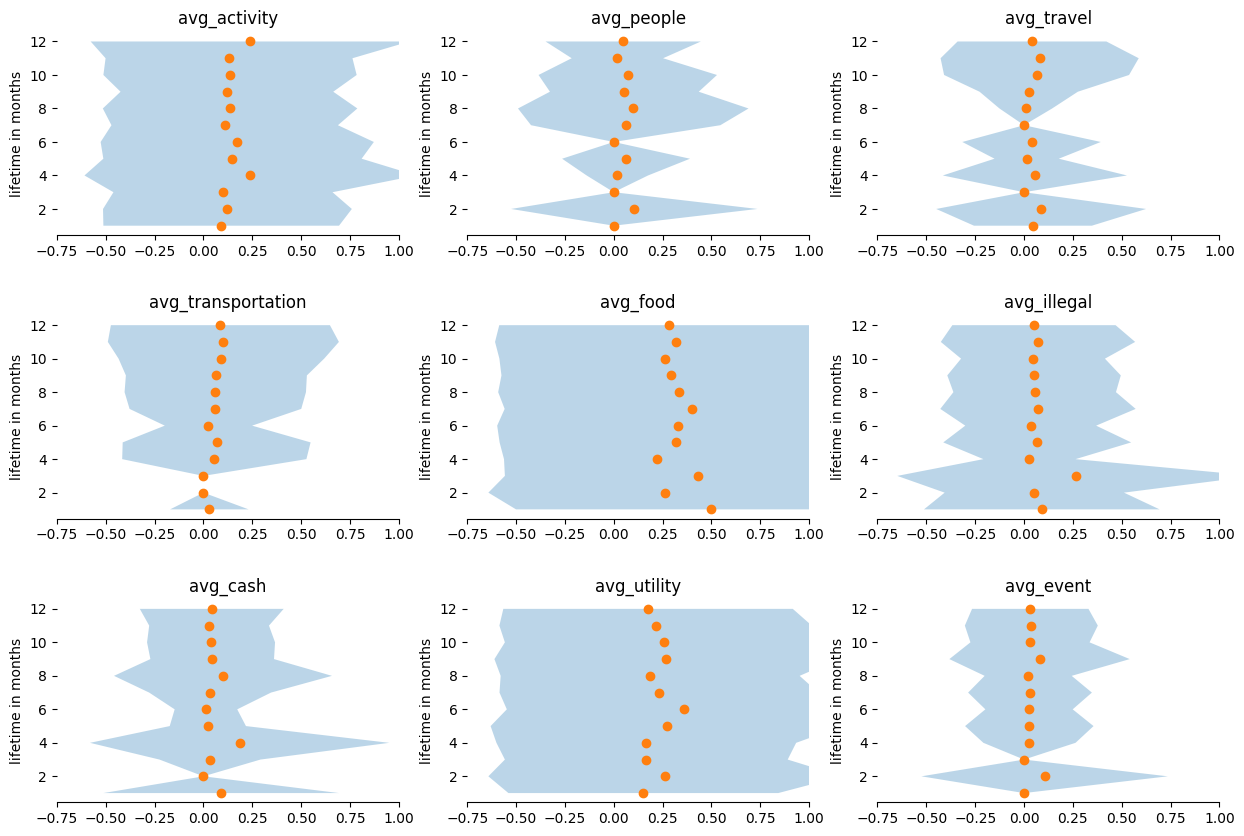

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the variables and subplots
variables = ['activity', 'people', 'travel', 'transportation', 'food', 'illegal', 'cash', 'utility', 'event']
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
plt.subplots_adjust(hspace=0.4)
sns.despine(left=True)

# Iterate over variables and create subplots
for idx, var in enumerate(variables):
    avg_variable = 'avg_' + var
    std_variable = 'std_' + var

    x = []
    lower_bound = []
    upper_bound = []

    for point in range(1, 13):
        avg = avg_by_time_pd.loc[(avg_by_time_pd.variable == avg_variable) & (avg_by_time_pd.life_point == point), 'value'].values[0]
        std = std_by_time_pd.loc[(std_by_time_pd.variable == std_variable) & (std_by_time_pd.life_point == point), 'value'].values[0]

        x.append(avg)
        lower_bound.append(avg - 2 * std)
        upper_bound.append(avg + 2 * std)

    y = list(range(1, 13))

    # Plot the confidence interval
    axes[idx // 3, idx % 3].set_xlim(-0.75, 1)
    axes[idx // 3, idx % 3].fill_betweenx(y, lower_bound, upper_bound, alpha=0.3)

    # Plot the average
    axes[idx // 3, idx % 3].scatter(x, y)

    axes[idx // 3, idx % 3].set_title(avg_variable)
    axes[idx // 3, idx % 3].set_ylabel("lifetime in months")

# Show the plots
plt.show()


In [ ]:
# Most of the average spendings stabilize after the first life point.

# Social Network Analytics (SNA)

In [ ]:
spark = SparkSession\
        .builder\
        .master("local[*]")\
        .config("spark.jars.packages", "graphframes:graphframes:0.8.1-spark3.0-s_2.12")\
        .getOrCreate()

In [ ]:
venmo_df = venmo_df.sample(fraction=0.01, seed=42)

In [ ]:
venmo_df.show()

+-------+--------+----------------+--------------------+--------------------+-----------+--------------------+
|  user1|   user2|transaction_type|            datetime|         description|is_business|            story_id|
+-------+--------+----------------+--------------------+--------------------+-----------+--------------------+
| 473246|  357995|         payment|2016-02-10T08:58:...|                🎅🏿|      false|56ba8b29cd03c9af2...|
| 811090|  864824|          charge|2014-12-12T15:17:...|          Zp dinnah!|      false|548a9684ca134c404...|
|1508991| 1141580|         payment|2015-01-27T01:46:...|            🍻🍻🍺🍺|      false|54c67d5bca134c404...|
|3959333| 2942063|         payment|2016-02-08T23:32:...|              🏡🍾👭|      false|56b8b510cd03c9af2...|
|1069346| 3543226|          charge|2015-10-07T10:26:...|        Pay yo bills|      false|561490e5cd03c9af2...|
|5621067| 7237863|         payment|2016-05-21T04:54:...|                  📺|      false|573f8799cd03c9af2...|
|2164273|  

### Script to find user’s friends and friends of friends

(Friend definition: A user’s friend is someone who has transacted with the user, either sending money to the user or receiving money from the user).


In [ ]:
user_subset = venmo_df.select("user1", "user2").dropDuplicates()
# Create a temporary view for the user_subset
user_subset.createOrReplaceTempView("user_subset")
user_subset.show()

+-------+-------+
|  user1|  user2|
+-------+-------+
|1542962|1561864|
|2625628|2626024|
|2918884|2244083|
| 696661| 198957|
| 304267| 276828|
|2737539|3002157|
|2991028|4114608|
|8977153|6819793|
|1541941|4726257|
|1879914|2950156|
|1452517| 525298|
| 139135|7819027|
|2657367|6903077|
|5608012|4441477|
|2717207|1552945|
|6203804|6252525|
| 965058| 221317|
|5766322|1789988|
|5374147|7286662|
|2140410|2450827|
+-------+-------+
only showing top 20 rows



#### List of friends and friends of friends

In [ ]:
# Find friends for all users
query = """
          SELECT A.user1 AS user_id, A.user2 AS friend_id
          FROM user_subset A
          UNION
          SELECT B.user2 AS user_id, B.user1 AS friend_id
          FROM user_subset B
"""

user_friends = spark.sql(query)
user_friends.createOrReplaceTempView("user_friends")
user_friends.show()

+-------+---------+
|user_id|friend_id|
+-------+---------+
|1542962|  1561864|
|2625628|  2626024|
|2918884|  2244083|
| 696661|   198957|
| 304267|   276828|
|2737539|  3002157|
|2991028|  4114608|
|8977153|  6819793|
|1541941|  4726257|
|1879914|  2950156|
|1452517|   525298|
| 139135|  7819027|
|2657367|  6903077|
|5608012|  4441477|
|2717207|  1552945|
|6203804|  6252525|
| 965058|   221317|
|5766322|  1789988|
|5374147|  7286662|
|2140410|  2450827|
+-------+---------+
only showing top 20 rows



In [ ]:
# Find friends for all users
query = """
          with temp1 as(
          SELECT A.user1 AS user_id, A.user2 AS friend_id, 1 AS Contact_Num
          FROM user_subset A
          UNION
          SELECT B.user2 AS user_id, B.user1 AS friend_id, 1 As Contact_Num
          FROM user_subset B
          ),
          temp2 as (
          Select distinct A.user_id as user_id,
          B.friend_id as friend_id, 2 AS Contact_Num
          From temp1 A
          Left JOIN temp1 B on A.friend_id = B.user_id
          and A.user_id <> B.friend_id
          where B.friend_id is not NULL
          ),
          temp3 as (
          Select user_id, friend_id, Contact_Num
          from temp1
          UNION
          Select user_id, friend_id, Contact_Num
          from temp2
          order by user_id
          ),
          temp4 as (
          Select *,
          row_number() OVER(PARTITION BY user_id, friend_id ORDER BY Contact_Num) AS rank_num
          FROM temp3
          ),
          cte_f as (
          select user_id,
            collect_list(friend_id) as friends
            from temp1
            group by user_id
            ),
          cte_ff (
          Select user_id, collect_list(friend_id) as friends_friend
          FROM temp4
          where rank_num =1 and Contact_Num = 2
          group by user_id
          )
          select cte_f.user_id, friends, friends_friend
          From cte_f
          Left join cte_ff on cte_f.user_id = cte_ff.user_id
          order by  user_id
"""

all_friends = spark.sql(query)
all_friends.show()

+--------+-----------+--------------+
| user_id|    friends|friends_friend|
+--------+-----------+--------------+
|      10|[71056, 43]|       [47104]|
| 1000013|   [882320]|          null|
| 1000024|  [1571549]|      [691294]|
| 1000031|  [3692874]|          null|
| 1000063|   [999123]|          null|
|10000740|  [6286189]|          null|
| 1000099|  [3149184]|          null|
| 1000119|  [1562407]|          null|
| 1000129|  [2939678]|          null|
| 1000132|  [4300675]|          null|
| 1000158|   [511362]|          null|
|10001662|  [3759599]|          null|
| 1000204|  [4215633]|          null|
| 1000222|   [886822]|          null|
|10002713|  [8035734]|          null|
| 1000278|  [1716420]|     [1918994]|
| 1000281|  [5774380]|          null|
|10003088|  [1413336]|          null|
| 1000318|  [1525495]|      [760137]|
|10003386|  [3552552]|          null|
+--------+-----------+--------------+
only showing top 20 rows

time: 15.5 s (started: 2023-05-25 00:26:36 +00:00)


## Social network metrics across a user’s lifetime in Venmo (from 0 up to 12 months)

### Number of friends and number of friends of friends

#### Static count of Friends and Friends of Friends

In [ ]:
# Find friends for all users static
query = """
          with temp1 as(
          SELECT A.user1 AS user_id, A.user2 AS friend_id, 1 AS Contact_Num
          FROM user_subset A
          UNION
          SELECT B.user2 AS user_id, B.user1 AS friend_id, 1 As Contact_Num
          FROM user_subset B
          ),
          temp2 as (
          Select distinct A.user_id as user_id,
          B.friend_id as friend_id, 2 AS Contact_Num
          From temp1 A
          Left JOIN temp1 B on A.friend_id = B.user_id
          and A.user_id <> B.friend_id
          where B.friend_id is not NULL
          ),
          temp3 as (
          Select user_id, friend_id, Contact_Num
          from temp1
          UNION
          Select user_id, friend_id, Contact_Num
          from temp2
          order by user_id
          ),
          temp4 as (
          Select *,
          row_number() OVER(PARTITION BY user_id, friend_id ORDER BY Contact_Num) AS rank_num
          FROM temp3
          )
          Select user_id,
          CASE
          WHEN Contact_Num = 1 THEN 'Friend'
          WHEN Contact_Num = 2 THEN 'FriendOfFriend'
          END AS Contact,
          sum(rank_num) as Total
          from temp4
          where rank_num =1
          group by user_id, Contact_Num
          order by user_id, Contact_Num
"""

static_friends_count = spark.sql(query)
static_friends_count.show()

+--------+-----------+--------------+-----+
| user_id|Contact_Num|       Contact|Total|
+--------+-----------+--------------+-----+
|      10|          1|        Friend|    3|
|      10|          2|FriendOfFriend|    2|
| 1000002|          1|        Friend|    1|
|10000027|          1|        Friend|    1|
| 1000006|          1|        Friend|    1|
| 1000006|          2|FriendOfFriend|    1|
| 1000013|          1|        Friend|    4|
| 1000013|          2|FriendOfFriend|    5|
|10000139|          1|        Friend|    1|
|10000139|          2|FriendOfFriend|    1|
| 1000022|          1|        Friend|    3|
| 1000022|          2|FriendOfFriend|    7|
| 1000024|          1|        Friend|    2|
| 1000024|          2|FriendOfFriend|    2|
|10000289|          1|        Friend|    1|
| 1000029|          1|        Friend|    1|
| 1000031|          1|        Friend|    3|
| 1000031|          2|FriendOfFriend|    6|
| 1000035|          1|        Friend|    2|
| 1000035|          2|FriendOfFr

#### Lifetime count of Friends and Friends of Friends

In [ ]:
user_month = venmo_df.select("user1", "user2","datetime").dropDuplicates()
# Create a temporary view for the user_subset
user_month.createOrReplaceTempView("user_month")
user_month.show()

+-------+-------+--------------------+
|  user1|  user2|            datetime|
+-------+-------+--------------------+
|3245723|1951007|2016-08-07T03:50:...|
|1688153|1535384|2015-04-26T00:46:...|
|1255452|1136797|2014-04-22T07:42:...|
|2833021|1448124|2016-10-16T11:54:...|
|2968160|1867209|2016-07-10T09:19:...|
|8128981|5315878|2016-03-04T05:28:...|
| 830284| 830555|2015-03-08T10:16:...|
|3026689| 492872|2015-04-17T00:53:...|
|1772857|1476983|2015-08-12T01:52:...|
|2208210|1915443|2015-10-16T06:30:...|
|1849616|1853994|2014-10-06T05:01:...|
|7100227|2355572|2016-03-10T08:14:...|
|2897725| 922630|2015-07-24T06:25:...|
|1124952| 889605|2016-08-09T11:15:...|
|2237730|2293597|2016-05-08T23:40:...|
|2470605| 661130|2016-01-28T03:20:...|
|4152388|6631921|2015-11-18T16:04:...|
| 527265| 640428|2015-05-14T23:01:...|
| 959416|1301570|2015-10-20T00:32:...|
|6138527|9464194|2016-10-01T05:42:...|
+-------+-------+--------------------+
only showing top 20 rows



In [ ]:
# Count friends for all users monthwise
query = """ with temp1 as (
          Select distinct user1 as user_id, user2 as friend_id,
          datetime
          From user_month
          Union
          Select distinct user2 as user_id, user1 as friend_id,
          datetime
          From user_month
        ),
        temp2 as (
          Select user_id, min(datetime) as firstDate
          From temp1
          group by user_id
        ),
        temp3 as (
          Select temp1.user_id, friend_id, datetime, firstDate,
          DATEDIFF(month, firstDate, datetime) as month_num,
          dense_rank() OVER(PARTITION BY temp1.user_id, friend_id ORDER BY datetime) AS rank_num
          From temp1
          Left Join temp2 on temp1.user_id = temp2.user_id
          where DATEDIFF(month, firstDate, datetime) between 0 and 12
        )
          Select distinct user_id, month_num,
          count(friend_id) OVER(PARTITION BY user_id, datetime) AS friends_count
          From temp3
          where rank_num =1
          order by user_id, month_num
"""

dynamic_friends_count = spark.sql(query)
dynamic_friends_count.createOrReplaceTempView("dynamic_friends_count")
dynamic_friends_count.show()

+--------+---------+-------------+
| user_id|month_num|friends_count|
+--------+---------+-------------+
|      10|        0|            1|
|      10|       12|            1|
| 1000013|        0|            1|
| 1000024|        0|            1|
| 1000031|        0|            1|
| 1000063|        0|            1|
|10000740|        0|            1|
| 1000099|        0|            1|
| 1000119|        0|            1|
| 1000129|        0|            1|
| 1000132|        0|            1|
| 1000158|        0|            1|
|10001662|        0|            1|
| 1000204|        0|            1|
| 1000222|        0|            1|
|10002713|        0|            1|
| 1000278|        0|            1|
| 1000281|        0|            1|
|10003088|        0|            1|
| 1000318|        0|            1|
+--------+---------+-------------+
only showing top 20 rows



In [ ]:
# Count friends of friends for all users
query = """ with temp1 as (
          Select distinct user1 as user_id, user2 as friend_id,
          datetime
          From user_month
          Union
          Select distinct user2 as user_id, user1 as friend_id,
          datetime
          From user_month
        ),
        temp2 as (
          Select user_id, min(datetime) as firstDate
          From temp1
          group by user_id
        ),
        temp3 as (
          Select temp1.user_id as user_id, friend_id, datetime, firstDate,
          DATEDIFF(month, firstDate, datetime) as month_num,
          dense_rank() OVER(PARTITION BY temp1.user_id, friend_id ORDER BY datetime) AS rank_num
          From temp1
          Left Join temp2 on temp1.user_id = temp2.user_id
          where DATEDIFF(month, firstDate, datetime) between 0 and 12
        ),
        temp4 as (
          Select distinct user_id, friend_id, month_num, 1 As Contact_Num
          From temp3
          where rank_num =1
          UNION
          Select distinct A.user_id as user_id,
          B.friend_id as friend_id,
          DATEDIFF(month, B.datetime, A.firstDate) as month_num,
          2 AS Contact_Num
          From temp3 A
          Left JOIN temp3 B on A.friend_id = B.user_id
          and A.user_id <> B.friend_id
          where B.friend_id is not NULL
          and DATEDIFF(month, B.datetime, A.firstDate) between 0 and 12
        ),
        temp5 as (
          Select *,
          row_number() OVER(PARTITION BY user_id, friend_id, month_num ORDER BY Contact_Num) AS rank_num
          FROM temp4
        )
          Select user_id, month_num,
          count(friend_id) OVER(PARTITION BY user_id, Contact_Num, month_num) AS friends_friends_count
          from temp5
          where rank_num=1 and Contact_Num = 2
          order by user_id, month_num

"""

dynamic_fof_count = spark.sql(query)
dynamic_fof_count.createOrReplaceTempView("dynamic_fof_count")
dynamic_fof_count.show()

+--------+---------+---------------------+
| user_id|month_num|friends_friends_count|
+--------+---------+---------------------+
|      10|        6|                    1|
| 1000024|        8|                    1|
| 1000278|        6|                    1|
| 1000318|        2|                    1|
| 1001206|        1|                    1|
| 1001264|        4|                    1|
|10027969|        3|                    1|
| 1002827|        6|                    1|
| 1003416|        0|                    1|
| 1003671|        7|                    1|
| 1003971|       12|                    1|
|10040360|       10|                    1|
|  100490|       10|                    1|
| 1006114|        6|                    1|
|10061224|        7|                    1|
|10066972|        0|                    1|
| 1006833|        6|                    1|
| 1007396|        6|                    1|
| 1008961|        2|                    1|
|    1009|        0|                    1|
+--------+-

In [ ]:
# create continuous user lifetime
month_list = [0,1,2,3,4,5,6,7,8,9,10,11,12]
dummy_month = user_friends.select("user_id").distinct().withColumn("month_num", F.array([F.lit(x) for x in month_list]))
dummy_month = dummy_month.withColumn("month_num", F.explode(col("month_num"))).orderBy("user_id","month_num")
dummy_month.createOrReplaceTempView("dummy_month")
dummy_month.show()

+-------+---------+
|user_id|month_num|
+-------+---------+
|     10|        0|
|     10|        1|
|     10|        2|
|     10|        3|
|     10|        4|
|     10|        5|
|     10|        6|
|     10|        7|
|     10|        8|
|     10|        9|
|     10|       10|
|     10|       11|
|     10|       12|
|1000013|        0|
|1000013|        1|
|1000013|        2|
|1000013|        3|
|1000013|        4|
|1000013|        5|
|1000013|        6|
+-------+---------+
only showing top 20 rows



In [ ]:
# Count friends of friends for all users
query = """
        with temp1 as (
        Select dummy_month.user_id, dummy_month.month_num
        ,COALESCE(dynamic_friends_count.friends_count, 0) AS friends_count
        ,COALESCE(dynamic_fof_count.friends_friends_count, 0) AS friends_friends_count
        From dummy_month
        Left JOIN dynamic_friends_count on dynamic_friends_count.user_id = dummy_month.user_id and dynamic_friends_count.month_num = dummy_month.month_num
        Left JOIN dynamic_fof_count ON dynamic_fof_count.user_id = dummy_month.user_id and dynamic_fof_count.month_num = dummy_month.month_num
        order by user_id, month_num
        )
        Select user_id, month_num
        ,sum(friends_count) OVER(PARTITION BY user_id order by month_num) AS friends_count_cum
        ,sum(friends_friends_count) OVER(PARTITION BY user_id order by month_num) AS friends_friends_count_cum
        from temp1
        order by user_id, month_num
"""

df_f_fof = spark.sql(query)
df_f_fof.createOrReplaceTempView("df_f_fof")
df_f_fof.show()

+-------+---------+-----------------+-------------------------+
|user_id|month_num|friends_count_cum|friends_friends_count_cum|
+-------+---------+-----------------+-------------------------+
|     10|        0|                1|                        0|
|     10|        1|                1|                        0|
|     10|        2|                1|                        0|
|     10|        3|                1|                        0|
|     10|        4|                1|                        0|
|     10|        5|                1|                        0|
|     10|        6|                1|                        1|
|     10|        7|                1|                        1|
|     10|        8|                1|                        1|
|     10|        9|                1|                        1|
|     10|       10|                1|                        1|
|     10|       11|                1|                        1|
|     10|       12|                2|   

#### Lifetime List of Friends and Friends of Friends

In [ ]:
# List friends for all users monthwise
query = """ with temp1 as (
          Select distinct user1 as user_id, user2 as friend_id,
          datetime
          From user_month
          Union
          Select distinct user2 as user_id, user1 as friend_id,
          datetime
          From user_month
        ),
        temp2 as (
          Select user_id, min(datetime) as firstDate
          From temp1
          group by user_id
        ),
        temp3 as (
          Select temp1.user_id, friend_id, datetime, firstDate,
          DATEDIFF(month, firstDate, datetime) as month_num,
          dense_rank() OVER(PARTITION BY temp1.user_id, friend_id ORDER BY datetime) AS rank_num
          From temp1
          Left Join temp2 on temp1.user_id = temp2.user_id
          where DATEDIFF(month, firstDate, datetime) <=12
        ),
        temp4 as (
          Select distinct user_id,
          month_num,
          friend_id
          From temp3
          where rank_num =1
        )
        Select user_id, month_num,
        collect_list(friend_id) OVER(PARTITION BY user_id ORDER BY month_num) as friend_id_list
        from temp4
        order by user_id, month_num


"""

dynamic_friends_list = spark.sql(query)
dynamic_friends_list.show()

+--------+---------+--------------+
| user_id|month_num|friend_id_list|
+--------+---------+--------------+
|      10|        0|       [71056]|
|      10|       12|   [71056, 43]|
| 1000013|        0|      [882320]|
| 1000024|        0|     [1571549]|
| 1000031|        0|     [3692874]|
| 1000063|        0|      [999123]|
|10000740|        0|     [6286189]|
| 1000099|        0|     [3149184]|
| 1000119|        0|     [1562407]|
| 1000129|        0|     [2939678]|
| 1000132|        0|     [4300675]|
| 1000158|        0|      [511362]|
|10001662|        0|     [3759599]|
| 1000204|        0|     [4215633]|
| 1000222|        0|      [886822]|
|10002713|        0|     [8035734]|
| 1000278|        0|     [1716420]|
| 1000281|        0|     [5774380]|
|10003088|        0|     [1413336]|
| 1000318|        0|     [1525495]|
+--------+---------+--------------+
only showing top 20 rows



In [ ]:
# List friends of friends for all users monthwise
query = """ with temp1 as (
          Select distinct user1 as user_id, user2 as friend_id,
          datetime
          From user_month
          Union
          Select distinct user2 as user_id, user1 as friend_id,
          datetime
          From user_month
        ),
        temp2 as (
          Select user_id, min(datetime) as firstDate
          From temp1
          group by user_id
        ),
        temp3 as (
          Select temp1.user_id as user_id, friend_id, datetime, firstDate,
          DATEDIFF(month, firstDate, datetime) as month_num,
          dense_rank() OVER(PARTITION BY temp1.user_id, friend_id ORDER BY datetime) AS rank_num
          From temp1
          Left Join temp2 on temp1.user_id = temp2.user_id
          where DATEDIFF(month, firstDate, datetime) between 0 and 12
        ),
        temp4 as (
          Select distinct user_id, friend_id, month_num, 1 As Contact_Num
          From temp3
          where rank_num =1
          UNION
          Select distinct A.user_id as user_id,
          B.friend_id as friend_id,
          DATEDIFF(month, B.datetime, A.firstDate) as month_num,
          2 AS Contact_Num
          From temp3 A
          Left JOIN temp3 B on A.friend_id = B.user_id
          and A.user_id <> B.friend_id
          where B.friend_id is not NULL
          and DATEDIFF(month, B.datetime, A.firstDate) between 0 and 12
        ),
        temp5 as (
          Select *,
          row_number() OVER(PARTITION BY user_id, friend_id, month_num ORDER BY Contact_Num) AS rank_num
          FROM temp4
        ),
        temp6 as (
          Select user_id, month_num, friend_id
          from temp5
          where rank_num=1 and Contact_Num = 2
        )
        Select user_id, month_num,
        collect_list(friend_id) OVER(PARTITION BY user_id order by month_num) AS friends_friends_list
        from temp6
        order by user_id, month_num

"""

dynamic_fof_list = spark.sql(query)
dynamic_fof_list.show()

+--------+---------+--------------------+
| user_id|month_num|friends_friends_list|
+--------+---------+--------------------+
| 1007396|        4|           [1586113]|
|10279155|        3|           [2281739]|
|10809899|        9|           [2285029]|
| 1083330|        9|            [130950]|
| 1084455|        5|            [397100]|
| 1109017|        2|            [953789]|
| 1111929|        3|           [1474414]|
|11168716|       11|           [6248339]|
| 1117183|        9|           [1995845]|
| 1172062|        3|            [964699]|
| 1179249|        1|            [535118]|
| 1202240|        6|           [1744728]|
| 1229847|        0|            [669367]|
| 1232856|       12|           [2338080]|
| 1243976|       10|           [3551154]|
| 1246917|       10|           [2611312]|
| 1344168|        7|           [1347032]|
| 1375825|        6|           [3189875]|
| 1378334|        5|           [5583707]|
| 1383318|       12|            [987554]|
+--------+---------+--------------

In [ ]:
# List friends of friends for all users monthwise
query = """ with temp1 as (
          Select distinct user1 as user_id, user2 as friend_id,
          datetime
          From user_month
          Union
          Select distinct user2 as user_id, user1 as friend_id,
          datetime
          From user_month
        ),
        temp2 as (
          Select user_id, min(datetime) as firstDate
          From temp1
          group by user_id
        ),
        temp3 as (
          Select temp1.user_id as user_id, friend_id, datetime, firstDate,
          DATEDIFF(month, firstDate, datetime) as month_num,
          dense_rank() OVER(PARTITION BY temp1.user_id, friend_id ORDER BY datetime) AS rank_num
          From temp1
          Left Join temp2 on temp1.user_id = temp2.user_id
          where DATEDIFF(month, firstDate, datetime) between 0 and 12
        ),
        temp4 as (
          Select distinct user_id, friend_id, month_num, 1 As Contact_Num
          From temp3
          where rank_num =1
          UNION
          Select distinct A.user_id as user_id,
          B.friend_id as friend_id,
          DATEDIFF(month, B.datetime, A.firstDate) as month_num,
          2 AS Contact_Num
          From temp3 A
          Left JOIN temp3 B on A.friend_id = B.user_id
          and A.user_id <> B.friend_id
          where B.friend_id is not NULL
          and DATEDIFF(month, B.datetime, A.firstDate) between 0 and 12
        ),
        temp5 as (
          Select *,
          row_number() OVER(PARTITION BY user_id, friend_id, month_num ORDER BY Contact_Num) AS rank_num
          FROM temp4
        ),
        temp6 as (
          Select user_id, month_num, friend_id as friends_friends
          from temp5
          where rank_num=1 and Contact_Num = 2
        ),
        temp7 as (
          Select distinct user_id,
          month_num,
          friend_id as friends
          From temp3
          where rank_num =1
          ),
        temp8 as (
          Select dummy_month.user_id, dummy_month.month_num
          ,friends
          ,friends_friends
          From dummy_month
          Left JOIN temp7 on temp7.user_id = dummy_month.user_id and temp7.month_num = dummy_month.month_num
          Left JOIN temp6 ON temp6.user_id = dummy_month.user_id and temp6.month_num = dummy_month.month_num
          )
          Select temp8.user_id as user_id, temp8.month_num as month_num
        ,collect_list(friends) OVER(PARTITION BY user_id order by month_num) AS friends_list
        ,collect_list(friends_friends) OVER(PARTITION BY user_id order by month_num) AS friends_friends_list
        from temp8
        order by user_id, month_num

"""

df_f_fof_list = spark.sql(query)
df_f_fof_list.createOrReplaceTempView("df_f_fof_list")
df_f_fof_list.show()

+-------+---------+------------+--------------------+
|user_id|month_num|friends_list|friends_friends_list|
+-------+---------+------------+--------------------+
|     10|        0|     [71056]|                  []|
|     10|        1|     [71056]|                  []|
|     10|        2|     [71056]|                  []|
|     10|        3|     [71056]|                  []|
|     10|        4|     [71056]|                  []|
|     10|        5|     [71056]|                  []|
|     10|        6|     [71056]|             [47104]|
|     10|        7|     [71056]|             [47104]|
|     10|        8|     [71056]|             [47104]|
|     10|        9|     [71056]|             [47104]|
|     10|       10|     [71056]|             [47104]|
|     10|       11|     [71056]|             [47104]|
|     10|       12| [71056, 43]|             [47104]|
|1000013|        0|    [882320]|                  []|
|1000013|        1|    [882320]|                  []|
|1000013|        2|    [8823

### Clustering coefficient of a user's network

In [ ]:
from pyspark.sql.window import Window

In [ ]:
# Define a window specification to partition the data by user_id and order by month
windowSpec = Window.partitionBy("user_id").orderBy("month_num")

In [ ]:
# Calculate the clustering coefficient month-wise
df_f_fof = df_f_fof.withColumn("triangles", (df_f_fof["friends_count_cum"] * (df_f_fof["friends_count_cum"] - 1)) / 2)
df_f_fof.show()

+-------+---------+-----------------+-------------------------+---------+
|user_id|month_num|friends_count_cum|friends_friends_count_cum|triangles|
+-------+---------+-----------------+-------------------------+---------+
|     10|        0|                1|                        0|      0.0|
|     10|        1|                1|                        0|      0.0|
|     10|        2|                1|                        0|      0.0|
|     10|        3|                1|                        0|      0.0|
|     10|        4|                1|                        0|      0.0|
|     10|        5|                1|                        0|      0.0|
|     10|        6|                1|                        1|      0.0|
|     10|        7|                1|                        1|      0.0|
|     10|        8|                1|                        1|      0.0|
|     10|        9|                1|                        1|      0.0|
|     10|       10|                1| 

In [ ]:
df_f_fof = df_f_fof.withColumn("possible_triangles", (df_f_fof["friends_count_cum"] + df_f_fof["friends_friends_count_cum"]) * (df_f_fof["friends_count_cum"] + df_f_fof["friends_friends_count_cum"] - 1) / 2)
df_f_fof.show()

+-------+---------+-----------------+-------------------------+---------+------------------+
|user_id|month_num|friends_count_cum|friends_friends_count_cum|triangles|possible_triangles|
+-------+---------+-----------------+-------------------------+---------+------------------+
|     10|        0|                1|                        0|      0.0|               0.0|
|     10|        1|                1|                        0|      0.0|               0.0|
|     10|        2|                1|                        0|      0.0|               0.0|
|     10|        3|                1|                        0|      0.0|               0.0|
|     10|        4|                1|                        0|      0.0|               0.0|
|     10|        5|                1|                        0|      0.0|               0.0|
|     10|        6|                1|                        1|      0.0|               1.0|
|     10|        7|                1|                        1|      0

In [ ]:
df_f_fof = df_f_fof.withColumn("clustering_coefficient", F.when(df_f_fof["possible_triangles"] > 0, df_f_fof["triangles"] / df_f_fof["possible_triangles"]).otherwise(0))
df_f_fof.createOrReplaceTempView("df_f_fof")
df_f_fof.show()

+-------+---------+-----------------+-------------------------+---------+------------------+----------------------+
|user_id|month_num|friends_count_cum|friends_friends_count_cum|triangles|possible_triangles|clustering_coefficient|
+-------+---------+-----------------+-------------------------+---------+------------------+----------------------+
|     10|        0|                1|                        0|      0.0|               0.0|                   0.0|
|     10|        1|                1|                        0|      0.0|               0.0|                   0.0|
|     10|        2|                1|                        0|      0.0|               0.0|                   0.0|
|     10|        3|                1|                        0|      0.0|               0.0|                   0.0|
|     10|        4|                1|                        0|      0.0|               0.0|                   0.0|
|     10|        5|                1|                        0|      0.0

### Page rank of each user

In [ ]:
from graphframes import GraphFrame

In [ ]:
vertices = user_friends.selectExpr("user_id as id").distinct()
edges = user_friends.selectExpr("user_id as src", "friend_id as dst")
graph = GraphFrame(vertices, edges)
pagerank = graph.pageRank(resetProbability=0.15, tol=0.01)
df_pagerank = pagerank.vertices.selectExpr("id as user_id", "pagerank").orderBy("pagerank", ascending=False)
df_pagerank.createOrReplaceTempView("df_pagerank")
df_pagerank.show()

/usr/local/lib/python3.10/dist-packages/pyspark/sql/dataframe.py:169: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pyspark/sql/dataframe.py:148: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


+-------+------------------+
|user_id|          pagerank|
+-------+------------------+
|1002607| 9.569389128569794|
| 820531| 6.602097862209916|
|6671483|2.7174323451866407|
|1116467|2.3004584985886547|
| 170573|2.3004584985886547|
|2076699|2.3004584985886547|
| 351821|2.3004584985886547|
|1265238|2.3004584985886547|
| 724531|2.3004584985886547|
| 354930|2.3004584985886547|
| 759712|2.3004584985886547|
| 248224|2.2209268318494257|
| 831087|2.1949498763871733|
| 433480| 2.194949876387173|
| 537760| 2.194949876387173|
|2581403|2.1047283031943644|
|1227346|2.1047283031943644|
| 613769|2.0391985842582367|
|1738566|2.0328780183573394|
| 185517|  2.01448310594115|
+-------+------------------+
only showing top 20 rows



### Final SNA output

In [ ]:
# Count friends of friends for all users
query = """
        Select A.user_id, A.month_num
        ,friends_count_cum
        ,friends_friends_count_cum
        ,clustering_coefficient
        ,pagerank
        from df_f_fof A
        Left Join df_pagerank B on A.user_id = B.user_id
        order by user_id, month_num
"""

df_venmo_sna = spark.sql(query)
df_venmo_sna.createOrReplaceTempView("df_venmo_sna")
df_venmo_sna.show()

+-------+---------+-----------------+-------------------------+----------------------+------------------+
|user_id|month_num|friends_count_cum|friends_friends_count_cum|clustering_coefficient|          pagerank|
+-------+---------+-----------------+-------------------------+----------------------+------------------+
|     10|        0|                1|                        0|                   0.0|1.2772318716875664|
|     10|        1|                1|                        0|                   0.0|1.2772318716875664|
|     10|        2|                1|                        0|                   0.0|1.2772318716875664|
|     10|        3|                1|                        0|                   0.0|1.2772318716875664|
|     10|        4|                1|                        0|                   0.0|1.2772318716875664|
|     10|        5|                1|                        0|                   0.0|1.2772318716875664|
|     10|        6|                1|         

In [ ]:
# df_venmo_sna.write.csv("venmo_sna.csv", header=True, mode="overwrite")

# Predictive Analytics with MLlib

In [ ]:
spark = SparkSession\
        .builder\
        .getOrCreate()

### How many transactions user had committed during her/his twelve months in Venmo? (Y variable for the predictive analytics)

In [ ]:
# SparkSession setup
spark = SparkSession.builder.appName("Venmo").getOrCreate()

# Loading the dataset
dataframe = spark.read.parquet("VenmoSample.snappy.parquet")
# Isolating unique user1 IDs
distinct_user1_ids = dataframe.select("user1").distinct()

# Subsetting 10% of the user1 IDs randomly
random_subset_ids = distinct_user1_ids.sample(withReplacement=False, fraction=0.01, seed=11111)

random_subset_ids.show()

# Filtering the original dataset with the subset of user1 IDs
filtered_dataframe = dataframe.join(random_subset_ids, on="user1")

filtered_dataframe.show()

filtered_dataframe.createOrReplaceTempView("Sample")

from pyspark.sql import functions as F

# Calculate max and min dates for each user
date_ranges = filtered_dataframe.groupBy("user1").agg(
    F.max("datetime").alias("last_transaction"),
    F.min("datetime").alias("first_transaction")
)

# Filter users who have been on the platform for over a year
valid_users = date_ranges.filter(
    F.datediff(F.col("last_transaction"), F.col("first_transaction")) > 365
)

# Join back to the original dataframe to retain transaction records along with last_transaction
valid_transactions = filtered_dataframe.join(
    valid_users,
    on="user1"
)

# Calculate the total number of transactions in the first year for each user
transactions_count = valid_transactions.filter(
    (F.col("datetime") >= F.date_sub(F.col("last_transaction"), 365)) &
    (F.col("datetime") <= F.col("last_transaction"))
).groupBy("user1").agg(
    F.count("datetime").alias("total_transactions")
)

transactions_count.show()

+-------+
|  user1|
+-------+
|   6620|
| 243392|
| 317828|
| 321666|
| 333479|
| 619248|
| 663961|
| 707930|
| 731446|
| 750639|
| 751485|
| 768789|
| 900004|
| 934818|
| 971791|
|1056442|
|1074192|
|1162591|
|1285756|
|1330274|
+-------+
only showing top 20 rows

+-------+-------+----------------+-------------------+--------------------+-----------+--------------------+
|  user1|  user2|transaction_type|           datetime|         description|is_business|            story_id|
+-------+-------+----------------+-------------------+--------------------+-----------+--------------------+
|1582311| 880966|         payment|2016-05-19 21:49:27|          🏰🌠🎠🎆🚗|      false|573dd277cd03c9af2...|
|1136626|3288280|          charge|2016-07-17 19:34:52|            THE DOME|      false|578b7b6c23e064eac...|
|2383212|2045295|         payment|2016-01-31 05:08:16|                  🍺|      false|56ad2640cd03c9af2...|
|2257760|1933300|         payment|2016-02-06 05:24:19|                  🐭|      false|

### Creating recency and frequency variables for CRM RFM framework. Here, we don’t have monetary amounts, so we will focus on just RF.

Recency refers to the last time a user was active, and frequency is how often a user uses Venmo in a month.

In [ ]:
from pyspark.sql import functions as F
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql.window import Window  # Importing the Window class

# Convert datetime to date
valid_transactions = valid_transactions.withColumn('transaction_date', F.to_date('datetime'))

# Define window partitioned by user1
user_window = Window.partitionBy('user1')

# Find the most recent transaction date for each user and calculate the difference in days and months
valid_transactions = valid_transactions.withColumn('latest_transaction_date', F.max('transaction_date').over(user_window))
valid_transactions = valid_transactions.withColumn('days_since_transaction', F.datediff('latest_transaction_date', 'transaction_date'))
valid_transactions = valid_transactions.withColumn('lifetime_point', (valid_transactions['days_since_transaction'] / 30).cast('integer'))

# Filter out transactions that occurred after the first 12 months
valid_transactions = valid_transactions.filter(valid_transactions.lifetime_point <= 11)

# Group transactions by user1 and months_since_transaction
grouped_transactions = valid_transactions.groupBy('user1', 'lifetime_point')

# Calculate recency and frequency for each group
recency_and_frequency = grouped_transactions.agg(
    # Recency is calculated as the maximum number of days in a month (30) minus the maximum number of days since a transaction in that month
    (30 * (F.col('lifetime_point') + 1) - F.max('days_since_transaction')).alias('recency'),

    # Frequency is calculated as the number of days in a month (30) divided by the number of transactions in that month
    (30 / F.count('*')).alias('frequency')
)

recency_and_frequency.show()

+-----+--------------+-------+---------+
|user1|lifetime_point|recency|frequency|
+-----+--------------+-------+---------+
| 5232|             7|     13|     15.0|
| 5232|             9|      3|     30.0|
| 5232|             0|     30|     30.0|
| 5232|             8|     10|     30.0|
|36513|             0|     30|     30.0|
|46520|             0|     12|     10.0|
|46520|             4|      2|     10.0|
|46520|             3|     28|     15.0|
|46520|             7|      3|     10.0|
|46520|             6|     27|     30.0|
|49505|             0|      5|     15.0|
|49577|             7|      9|     15.0|
|49577|             5|     14|     30.0|
|49577|             0|     30|     30.0|
|52525|             0|     30|     30.0|
|62177|             0|     30|     30.0|
|65802|            11|      7|     30.0|
|65802|             6|     16|     30.0|
|65802|             1|     11|     15.0|
|65802|             0|     14|     15.0|
+-----+--------------+-------+---------+
only showing top

### Regress recency and frequency on Total Transactions

In [ ]:
# Join the two dataframes
combined_df = recency_and_frequency.join(transactions_count, on='user1', how='inner')

# Show the combined dataframe
combined_df.show()

combined_df_single_partition = combined_df.coalesce(1)

# Save the combined dataframe as a single CSV file
combined_df_single_partition.write.csv("combined_df.csv", header=True, mode="overwrite")

+-----+--------------+-------+---------+------------------+
|user1|lifetime_point|recency|frequency|total_transactions|
+-----+--------------+-------+---------+------------------+
| 5232|             7|     13|     15.0|                 5|
| 5232|             9|      3|     30.0|                 5|
| 5232|             0|     30|     30.0|                 5|
| 5232|             8|     10|     30.0|                 5|
|36513|             0|     30|     30.0|                 1|
|46520|             0|     12|     10.0|                12|
|46520|             4|      2|     10.0|                12|
|46520|             3|     28|     15.0|                12|
|46520|             7|      3|     10.0|                12|
|46520|             6|     27|     30.0|                12|
|49505|             0|      5|     15.0|                 2|
|49577|             7|      9|     15.0|                 4|
|49577|             5|     14|     30.0|                 4|
|49577|             0|     30|     30.0|

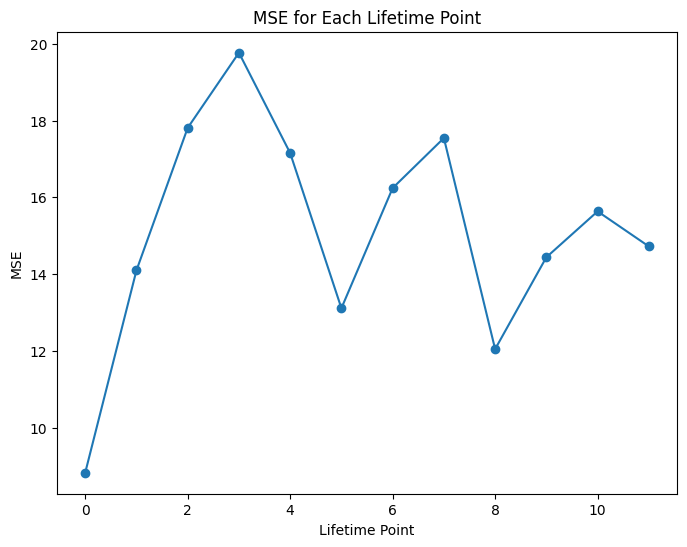

In [ ]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
import matplotlib.pyplot as plt

mse_dict = {}

for i in range(13):
    filtered_df = combined_df.filter(combined_df.lifetime_point == i)

    if filtered_df.count() == 0:
        continue

    train_data, test_data = filtered_df.randomSplit([0.8, 0.2], seed=42)

    assembler = VectorAssembler(inputCols=["recency", "frequency"], outputCol="features")

    train_data = assembler.transform(train_data)
    test_data = assembler.transform(test_data)

    train_dataset = train_data.select("features", "total_transactions").withColumnRenamed("total_transactions", "Y")
    test_dataset = test_data.select("features", "total_transactions").withColumnRenamed("total_transactions", "Y")

    lr = LinearRegression(featuresCol="features", labelCol="Y")

    lr_model = lr.fit(train_dataset)

    predictions = lr_model.transform(test_dataset)

    mse = predictions.selectExpr("POWER((Y - prediction), 2) as mse").groupBy().mean("mse").collect()[0][0]
    mse_dict[i] = mse

plt.figure(figsize=(8, 6))
plt.plot(range(12), mse_dict.values(), marker='o')
plt.xlabel("Lifetime Point")
plt.ylabel("MSE")
plt.title("MSE for Each Lifetime Point")
plt.show()

The predictive accuracy of recency and frequency in determining the total number of transactions improves and stabilizes over time, but there may be other influential factors during the early stages that contribute to the variability in the predictions.


### Regress recency, frequency AND the spending behavior profile on total transations.

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('loadData').getOrCreate()

file_path = 'Customer behvaior.csv'
customer_behavior = spark.read.csv(file_path, header=True)

# To see the first few rows of the loaded data
customer_behavior.show()

+--------+-----+--------+----+-----+-----+--------------+------+--------------+------+-------+------------------+
|   user1|month|Activity|Cash|Event| Food|IllegalSarcasm|People|Transportation|Travel|Utility|dynamic_percentage|
+--------+-----+--------+----+-----+-----+--------------+------+--------------+------+-------+------------------+
| 1000013|    6|       0|   0|    0|100.0|             0|     0|             0|     0|      0|             100.0|
| 1000057|    5|       0|   0|    0|100.0|             0|     0|             0|     0|      0|             100.0|
|10000940|    4|   100.0|   0|    0|    0|             0|     0|             0|     0|      0|             100.0|
|10003651|    4|       0|   0|    0|    0|             0|     0|             0|     0|  100.0|             100.0|
| 1000387|    1|       0|   0|    0|    0|             0|     0|             0|     0|  100.0|             100.0|
| 1000501|   10|       0|   0|    0|    0|             0|     0|             0|     0|  

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
customer_behavior.createOrReplaceTempView("customer_behavior")
recency_and_frequency.createOrReplaceTempView("recency_and_frequency")
transactions_count.createOrReplaceTempView("transactions_count")
df_regression2 = spark.sql("""
select transactions_count.user1, lifetime_point, recency, frequency, Activity, Cash, Event, Food, IllegalSarcasm, People, Transportation, Travel, Utility, total_transactions as Y
from customer_behavior
join transactions_count on customer_behavior.user1 = transactions_count.user1
join recency_and_frequency on recency_and_frequency.user1 = customer_behavior.user1""")
df_regression2.show()


+-----+--------------+-------+---------+--------+----+-----+-----+--------------+------+--------------+------+-------+---+
|user1|lifetime_point|recency|frequency|Activity|Cash|Event| Food|IllegalSarcasm|People|Transportation|Travel|Utility|  Y|
+-----+--------------+-------+---------+--------+----+-----+-----+--------------+------+--------------+------+-------+---+
|61428|             9|      6|     15.0|       0|   0|    0|    0|             0|     0|             0|     0|  100.0|  6|
|61428|            11|     14|     30.0|       0|   0|    0|    0|             0|     0|             0|     0|  100.0|  6|
|61428|             7|     20|     30.0|       0|   0|    0|    0|             0|     0|             0|     0|  100.0|  6|
|61428|             4|     18|     30.0|       0|   0|    0|    0|             0|     0|             0|     0|  100.0|  6|
|61428|             0|     30|     30.0|       0|   0|    0|    0|             0|     0|             0|     0|  100.0|  6|
|65258|         

In [ ]:
# df_regression2.write.csv('combined_regression', header=True, mode='overwrite')

In [ ]:
#reload data
file_path = 'combined_regression'
customer_behavior_2 = spark.read.csv(file_path, header=True)

# To see the first few rows of the loaded data
customer_behavior_2.show()

+-----+--------------+-------+---------+--------+----+-----+-----+--------------+------+--------------+------+-------+---+
|user1|lifetime_point|recency|frequency|Activity|Cash|Event| Food|IllegalSarcasm|People|Transportation|Travel|Utility|  Y|
+-----+--------------+-------+---------+--------+----+-----+-----+--------------+------+--------------+------+-------+---+
|61428|             9|      6|     15.0|       0|   0|    0|    0|             0|     0|             0|     0|  100.0|  6|
|61428|            11|     14|     30.0|       0|   0|    0|    0|             0|     0|             0|     0|  100.0|  6|
|61428|             7|     20|     30.0|       0|   0|    0|    0|             0|     0|             0|     0|  100.0|  6|
|61428|             4|     18|     30.0|       0|   0|    0|    0|             0|     0|             0|     0|  100.0|  6|
|61428|             0|     30|     30.0|       0|   0|    0|    0|             0|     0|             0|     0|  100.0|  6|
|65258|         

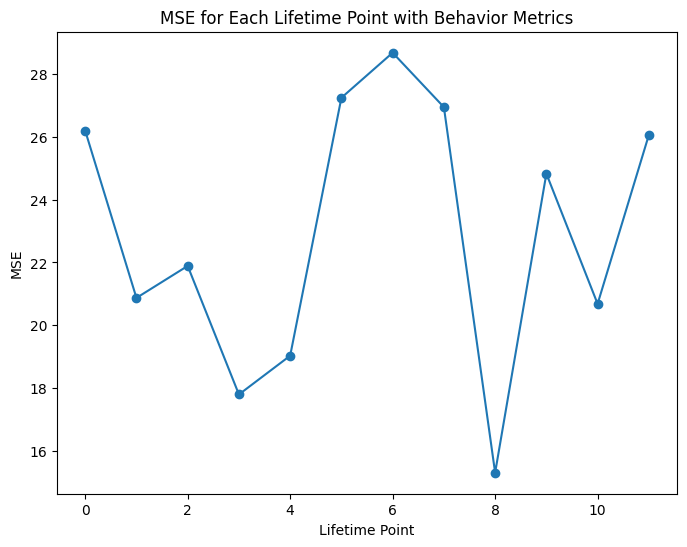

In [ ]:
from pyspark.sql.functions import col
from pyspark.sql.types import DoubleType
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
import matplotlib.pyplot as plt

# Convert the "Y" column to DoubleType
customer_behavior_2 = customer_behavior_2.withColumn("Y", col("Y").cast(DoubleType()))

mse_dict = {}

for i in range(13):
    filtered_df = customer_behavior_2.filter(customer_behavior_2.lifetime_point == i)

    if filtered_df.count() == 0:
        continue

    # Convert the columns to DoubleType
    columns_to_cast = ["recency", "frequency", "Activity", "Cash",
                       "Event", "Food", "IllegalSarcasm", "People",
                       "Transportation", "Travel", "Utility"]

    for col_name in columns_to_cast:
        filtered_df = filtered_df.withColumn(col_name, col(col_name).cast("double"))

    assembler = VectorAssembler(inputCols=columns_to_cast, outputCol="features")

    filtered_df = assembler.transform(filtered_df)

    train_data, test_data = filtered_df.randomSplit([0.8, 0.2], seed=42)

    train_dataset = train_data.select("features", "Y")
    test_dataset = test_data.select("features", "Y")

    lr = LinearRegression(featuresCol="features", labelCol="Y")

    lr_model = lr.fit(train_dataset)

    predictions = lr_model.transform(test_dataset)

    mse = predictions.selectExpr("POWER((Y - prediction), 2) as mse").groupBy().mean("mse").collect()[0][0]
    mse_dict[i] = mse

# Plot the MSE for each lifetime point
plt.figure(figsize=(8, 6))
plt.plot(list(mse_dict.keys()), list(mse_dict.values()), marker='o')
plt.xlabel("Lifetime Point")
plt.ylabel("MSE")
plt.title("MSE for Each Lifetime Point with Behavior Metrics")
plt.show()

### Regress the social network metrics on total transactions.

In [ ]:
socialnetworkmetrics = spark.read.csv("venmo_sna.csv", header=True)
socialnetworkmetrics.show()

+-------+---------+-----------------+-------------------------+----------------------+------------------+
|user_id|month_num|friends_count_cum|friends_friends_count_cum|clustering_coefficient|          pagerank|
+-------+---------+-----------------+-------------------------+----------------------+------------------+
|     10|        0|                1|                        0|                   0.0|1.2772318716875664|
|     10|        1|                1|                        0|                   0.0|1.2772318716875664|
|     10|        2|                1|                        0|                   0.0|1.2772318716875664|
|     10|        3|                1|                        0|                   0.0|1.2772318716875664|
|     10|        4|                1|                        0|                   0.0|1.2772318716875664|
|     10|        5|                1|                        0|                   0.0|1.2772318716875664|
|     10|        6|                1|         

In [ ]:
customer_behavior_2.createOrReplaceTempView("customer_behavior_2")
socialnetworkmetrics.createOrReplaceTempView("socialnetworkmetrics")
transactions_count.createOrReplaceTempView("transactions_count")

df_regression3 = spark.sql("""
    SELECT lifetime_point, recency, frequency, pagerank, clustering_coefficient, total_transactions AS Y
    FROM recency_and_frequency
    JOIN transactions_count ON recency_and_frequency.user1 = transactions_count.user1
    JOIN socialnetworkmetrics ON recency_and_frequency.user1 = socialnetworkmetrics.user_id
""")
df_regression3.show()

+--------------+-------+---------+------------------+----------------------+---+
|lifetime_point|recency|frequency|          pagerank|clustering_coefficient|  Y|
+--------------+-------+---------+------------------+----------------------+---+
|             8|      1|     30.0|1.0016935844938735|                   0.0|  9|
|             8|      1|     30.0|1.0016935844938735|                   0.0|  9|
|             8|      1|     30.0|1.0016935844938735|                   0.0|  9|
|             8|      1|     30.0|1.0016935844938735|                   0.0|  9|
|             8|      1|     30.0|1.0016935844938735|                   0.0|  9|
|             8|      1|     30.0|1.0016935844938735|                   0.0|  9|
|             8|      1|     30.0|1.0016935844938735|                   0.0|  9|
|             8|      1|     30.0|1.0016935844938735|                   0.0|  9|
|             8|      1|     30.0|1.0016935844938735|                   0.0|  9|
|             8|      1|    

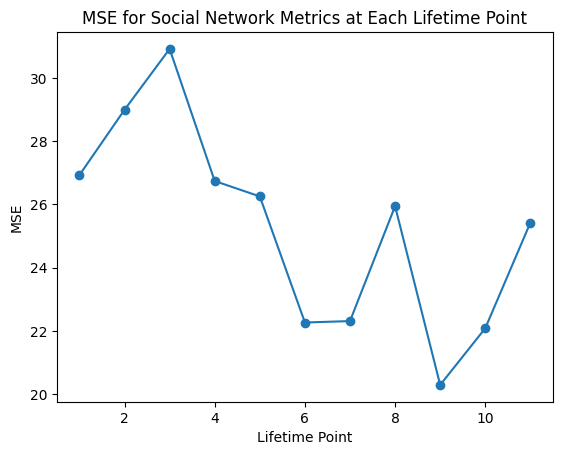

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.functions import col
import matplotlib.pyplot as plt

# Convert string columns to numeric types
df_regression3 = df_regression3.withColumn("pagerank", col("pagerank").cast("double"))
df_regression3 = df_regression3.withColumn("clustering_coefficient", col("clustering_coefficient").cast("double"))

# Prepare the data for regression
assembler = VectorAssembler(inputCols=["recency", "frequency", "pagerank", "clustering_coefficient"], outputCol="features")
regression_data = assembler.transform(df_regression3)

mse_values = []

# Perform regression analysis for each lifetime point
for point in range(1, 12):
    # Filter data for the current lifetime point
    point_data = regression_data.filter(regression_data.lifetime_point == point)

    # Split the data into training and testing sets
    (training_data, testing_data) = point_data.randomSplit([0.7, 0.3])

    # Create a Linear Regression model
    lr = LinearRegression(featuresCol="features", labelCol="Y")

    # Train the model
    model = lr.fit(training_data)

    # Make predictions on the testing data
    predictions = model.transform(testing_data)

    # Calculate the MSE
    evaluator = RegressionEvaluator(labelCol="Y", predictionCol="prediction", metricName="mse")
    mse = evaluator.evaluate(predictions)
    mse_values.append(mse)

# Plot the MSE for each lifetime point
plt.plot(range(1, 12), mse_values, marker='o')
plt.xlabel("Lifetime Point")
plt.ylabel("MSE")
plt.title("MSE for Social Network Metrics at Each Lifetime Point")
plt.show()


The graph highlights the varying performance of the prediction model at different stages of the customer lifetime. Similarly, when the social metrics variable is added, the overall trend goes downward but with intermittent increases and decreases.

### Regress the social network metrics and the spending behavior of social network on total transactions.

In [ ]:
#reload data
file_path = 'combined_regression'
customer_behavior_2 = spark.read.csv(file_path, header=True)

# To see the first few rows of the loaded data
customer_behavior_2.show()

# # To see the first few rows of the loaded data


customer_behavior_2.createOrReplaceTempView("customer_behavior")
transactions_count.createOrReplaceTempView("transactions_count")
socialnetworkmetrics.createOrReplaceTempView("socialnetworkmetrics")

df_regression4 = spark.sql("""
    SELECT `customer_behavior`.`lifetime_point`, `customer_behavior`.`recency`, `customer_behavior`.`frequency`, `socialnetworkmetrics`.`pagerank`, `socialnetworkmetrics`.`clustering_coefficient`, `customer_behavior`.`Activity`, `customer_behavior`.`Cash`, `customer_behavior`.`Event`, `customer_behavior`.`Food`, `customer_behavior`.`IllegalSarcasm`, `customer_behavior`.`People`, `customer_behavior`.`Transportation`, `customer_behavior`.`Travel`, `customer_behavior`.`Utility`, `transactions_count`.`total_transactions` AS Y
    FROM socialnetworkmetrics
    JOIN transactions_count ON socialnetworkmetrics.user_id = transactions_count.user1
    JOIN customer_behavior ON customer_behavior.user1 = socialnetworkmetrics.user_id
""")

df_regression4.show()

+-----+--------------+-------+---------+--------+----+-----+-----+--------------+------+--------------+------+-------+---+
|user1|lifetime_point|recency|frequency|Activity|Cash|Event| Food|IllegalSarcasm|People|Transportation|Travel|Utility|  Y|
+-----+--------------+-------+---------+--------+----+-----+-----+--------------+------+--------------+------+-------+---+
|61428|             9|      6|     15.0|       0|   0|    0|    0|             0|     0|             0|     0|  100.0|  6|
|61428|            11|     14|     30.0|       0|   0|    0|    0|             0|     0|             0|     0|  100.0|  6|
|61428|             7|     20|     30.0|       0|   0|    0|    0|             0|     0|             0|     0|  100.0|  6|
|61428|             4|     18|     30.0|       0|   0|    0|    0|             0|     0|             0|     0|  100.0|  6|
|61428|             0|     30|     30.0|       0|   0|    0|    0|             0|     0|             0|     0|  100.0|  6|
|65258|         

No data available for lifetime point 9
No data available for lifetime point 12


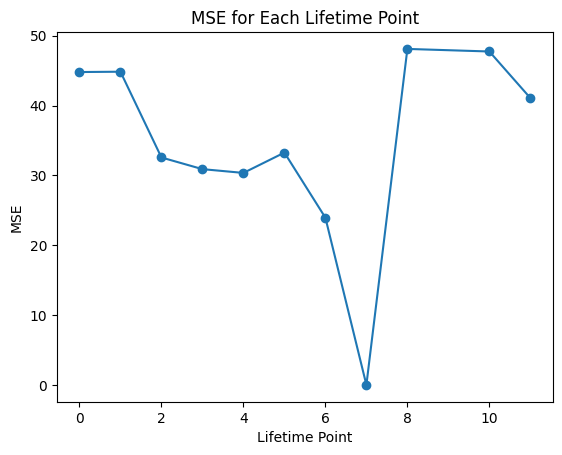

In [ ]:

# Cast columns to the appropriate data types
df_regression4 = df_regression4.withColumn("pagerank", col("pagerank").cast("double"))
df_regression4 = df_regression4.withColumn("clustering_coefficient", col("clustering_coefficient").cast("double"))
df_regression4 = df_regression4.withColumn("Activity", col("Activity").cast("double"))
df_regression4 = df_regression4.withColumn("Cash", col("Cash").cast("double"))
df_regression4 = df_regression4.withColumn("Event", col("Event").cast("double"))
df_regression4 = df_regression4.withColumn("Food", col("Food").cast("double"))
df_regression4 = df_regression4.withColumn("IllegalSarcasm", col("IllegalSarcasm").cast("double"))
df_regression4 = df_regression4.withColumn("People", col("People").cast("double"))
df_regression4 = df_regression4.withColumn("Transportation", col("Transportation").cast("double"))
df_regression4 = df_regression4.withColumn("Travel", col("Travel").cast("double"))
df_regression4 = df_regression4.withColumn("Utility", col("Utility").cast("double"))
df_regression4 = df_regression4.withColumn("Y", col("Y").cast("double"))

# Assemble the features into a vector
assembler = VectorAssembler(
    inputCols=["pagerank", "clustering_coefficient", "Activity", "Cash", "Event", "Food", "IllegalSarcasm", "People", "Transportation", "Travel", "Utility"],
    outputCol="features")

# Apply the vector assembler on the dataframe
df_assembled = assembler.transform(df_regression4)

# Split the data into train and test sets
train_data, test_data = df_assembled.randomSplit([0.8, 0.2], seed=42)

# Initialize the linear regression model
lr = LinearRegression(labelCol="Y")

# Initialize a dictionary to store the MSE for each lifetime point
mse_dict = {}

for lifetime_point in range(13):
    # Filter the data for the current lifetime point
    train_data_filtered = train_data.filter(train_data.lifetime_point == lifetime_point)
    test_data_filtered = test_data.filter(test_data.lifetime_point == lifetime_point)

    # Check if the training dataset is not empty
    if train_data_filtered.count() == 0:
        print(f"No data available for lifetime point {lifetime_point}")
        continue

    # Fit the linear regression model on the training data
    model = lr.fit(train_data_filtered)

    # Make predictions on the test data
    predictions = model.transform(test_data_filtered)

    # Evaluate the model using MSE
    evaluator = RegressionEvaluator(labelCol="Y", metricName="mse")
    mse = evaluator.evaluate(predictions)

    # Store the MSE for the current lifetime point
    mse_dict[lifetime_point] = mse

# Extract the lifetime points and MSE values
lifetime_points = list(mse_dict.keys())
mse_values = list(mse_dict.values())

# Plot the MSE for each lifetime point
plt.plot(lifetime_points, mse_values, marker='o')
plt.xlabel("Lifetime Point")
plt.ylabel("MSE")
plt.title("MSE for Each Lifetime Point")
plt.show()







When both variables are added, the MSE drops between lifetime 6-8 and then increases drastically.